In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
 
%matplotlib inline

In [2]:
#matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 15
M = 18
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# linewidth

L = 6

# Colors

C1 = '#144974' #(20,73,116)
C2 = '#0070C0'
C3 = '#A0A0A0'

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5


# Test plot

# plt.plot(np.arange(1,100,1),np.arange(1,100,1), label='Label')
# plt.xlabel('X Label')
# plt.ylabel('Y Label')
# plt.title('Title')
# plt.legend(loc='upper left')
# plt.show()

# Load Data, Clean, and Export as .csv for future use

In [ ]:
def get_and_clean_data():
    # The number of celeb images: 202599
    n_celeb_images = [67533, 135066, 202599]
    # The format specification here left pads zeros on the number: 000006.
    celeb_filenames1 = ['data/img_align_celeba/{:06d}.jpg'.format(i)
                        for i in range(1, n_celeb_images[0] + 1)]
    
    celeb_filenames2 = ['data/img_align_celeba/{:06d}.jpg'.format(i)
                            for i in range(1, n_celeb_images[1] + 1)]

    celeb_filenames3 = ['data/img_align_celeba/{:06d}.jpg'.format(i)
                            for i in range(1, n_celeb_images[2] + 1)]
    full_images=[]
    for i in celeb_filenames:
        full_images.append(jpg_image_to_array(i))

    df_labels = pd.read_csv('data/list_attr_celeba.csv')
    df_labels.columns = map(str.lower, df_labels.columns)
    df_labels.replace([-1], 0, inplace=True)
    return full_images, df_labels

In [36]:
# The number of celeb images: 202599
n_celeb_images = 200000
# The format specification here left pads zeros on the number: 000006.
celeb_filenames = ['data/img_align_celeba/{:06d}.jpg'.format(i)
                    for i in range(1, n_celeb_images + 1)]

In [37]:
def jpg_image_to_array(image_path):
  """
  Loads JPEG image into 3D Numpy array of shape 
  (width, height, channels)
  """
  with Image.open(image_path) as image:         
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
    im_arr = im_arr.resize((image.size[1], image.size[0], 3))                                   
    return im_arr

In [38]:
%%time
full_images=[]
for i in celeb_filenames:
    full_images.append(jpg_image_to_array(i))

/Users/AaronLee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/AaronLee/anaconda3/lib/python3.7/site-packages/IPython/core/magics/execution.py", line 1310, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 3, in <module>
  File "<ipython-input-37-d3aacf9996c4>", line 7, in jpg_image_to_array
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
  File "/Users/AaronLee/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 762, in tobytes
    self.load()
  File "/Users/AaronLee/anaconda3/lib/python3.7/site-packages/PIL/ImageFile.py", line 253, in load
    n, err_code = decoder.decode(b)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/AaronLee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the abov

KeyboardInterrupt: 

### Load labeled df

In [1]:
df = pd.read_csv('data/list_attr_celeba.csv')

In [2]:
df.columns = map(str.lower, df.columns)
df.replace([-1], 0, inplace=True)

In [15]:
df.attractive

0         1
1         0
2         0
3         1
4         1
5         1
6         1
7         0
8         1
9         1
10        1
11        1
12        0
13        0
14        0
15        0
16        0
17        0
18        1
19        0
20        0
21        0
22        1
23        1
24        0
25        1
26        1
27        1
28        1
29        0
         ..
202569    0
202570    0
202571    1
202572    0
202573    1
202574    0
202575    1
202576    1
202577    1
202578    0
202579    0
202580    0
202581    0
202582    0
202583    0
202584    0
202585    0
202586    1
202587    0
202588    1
202589    0
202590    1
202591    0
202592    1
202593    1
202594    1
202595    0
202596    0
202597    1
202598    1
Name: attractive, Length: 202599, dtype: int64

In [5]:
X = df.drop(columns=['image_id', 'male'], axis=1)
y = df.male

## Pictures Pictures Pictures

In [37]:
temp = [0,1,2]
for i in temp:
    img = Image.fromarray(full_images[i], 'RGB')
    img.show()

## Splitting by Gender

In [5]:
t = list(df.male==1)
idx = np.where(t)[0]

In [7]:
# male_pics = [full_images[x] for x in idx]
# len(male_pic)

In [15]:
male_df = df[df.male==1].drop('male', axis=1)
female_df = df[df.male==0].drop('male', axis=1)

## Plotting Data

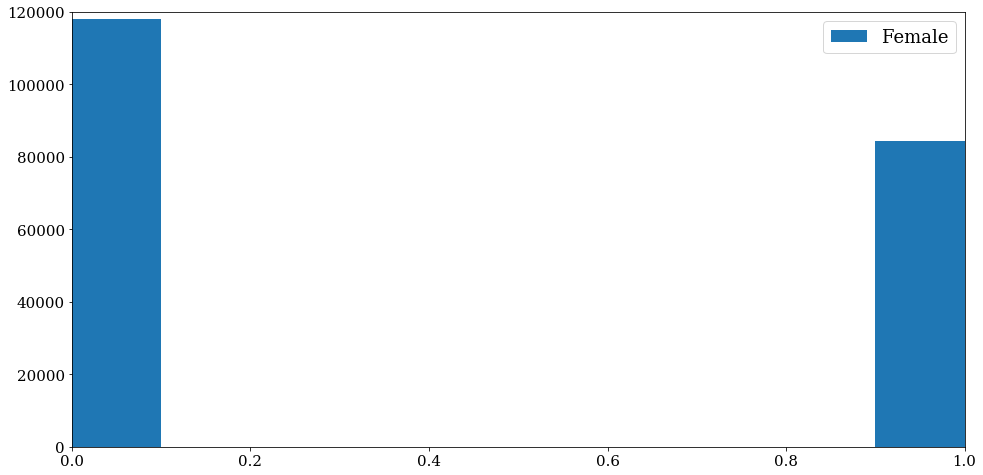

In [12]:
plt.hist(df.male)
plt.legend(['Female', 'Male']);

In [6]:
def male_female(df, col):
    '''
    df = Dataframe
    col = string
    '''
    a, b = df[df.male==1][col].value_counts()
    c, d = df[df.male==0][col].value_counts()
    print (col)
    print('Male: ({},{})'.format(a , b))
    print('Female: ({},{})'.format(c , d))
    print ('-------------------')
    return a, b, c, d

In [7]:
def attractive(df, col):
    '''
    df = Dataframe
    col = string
    '''
    a, b = df[df.attractive==1][col].value_counts()
    c, d = df[df.attractive==0][col].value_counts()
    print (col)
    print('Attractive: ({},{})'.format(a , b))
    print('Not Attractive: ({},{})'.format(c , d))
    print ('-------------------')
    return a, b, c, d

In [8]:
def plot_pie(df, func, col, target):    
    a, b, c, d = func(df, col)
    fig, ax = plt.subplots(figsize=(8,8))

    size = 0.3
    vals = np.array([[a, b], [c, d]])
    labels = ['{}'.format(target), 'Not {}'.format(target)]
    labels1 = ['not {}'.format(col), col, 'not {}'.format(col), col]

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(3)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9]))

    ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
           labels=labels, wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
           labels=labels1, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%')

    ax.set(aspect="equal", title=col)
    plt.show()

5_o_clock_shadow
Male: (61938,22496)
Female: (118145,20)
-------------------


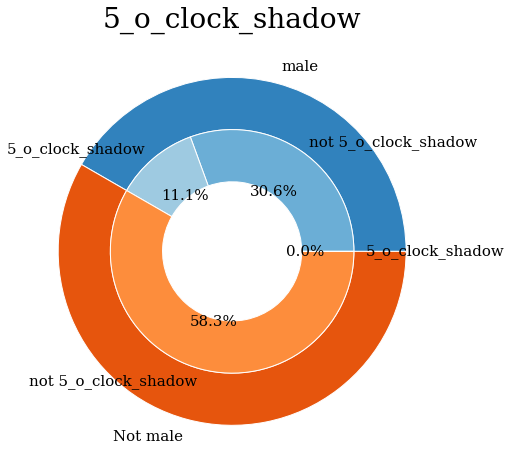

arched_eyebrows
Male: (79921,4513)
Female: (68588,49577)
-------------------


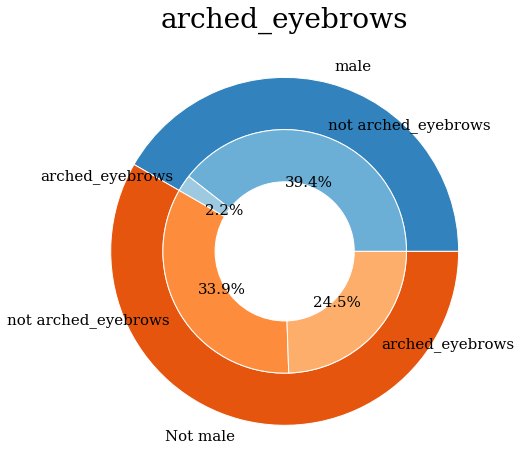

attractive
Male: (60855,23579)
Female: (80254,37911)
-------------------


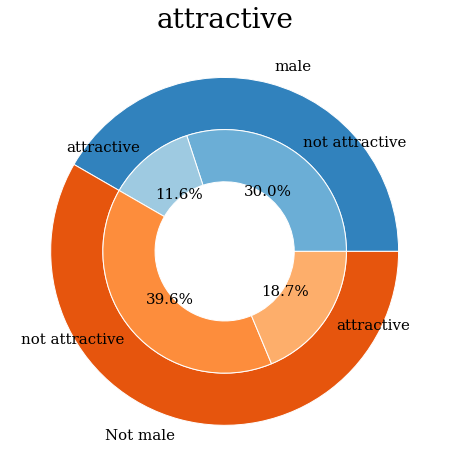

bags_under_eyes
Male: (55030,29404)
Female: (106123,12042)
-------------------


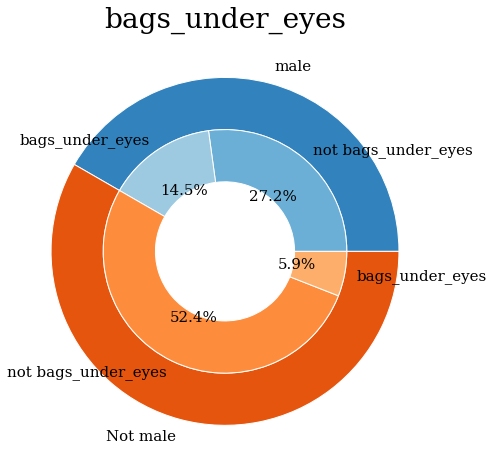

bald
Male: (79904,4530)
Female: (118148,17)
-------------------


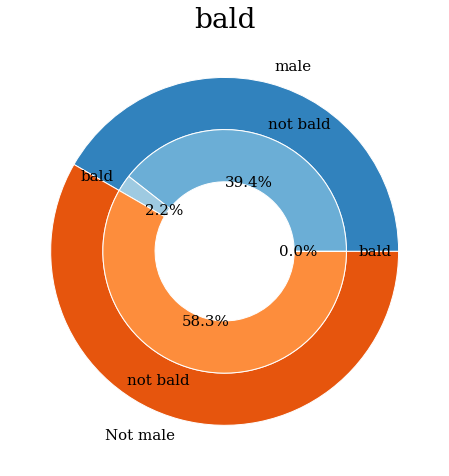

bangs
Male: (77484,6950)
Female: (94406,23759)
-------------------


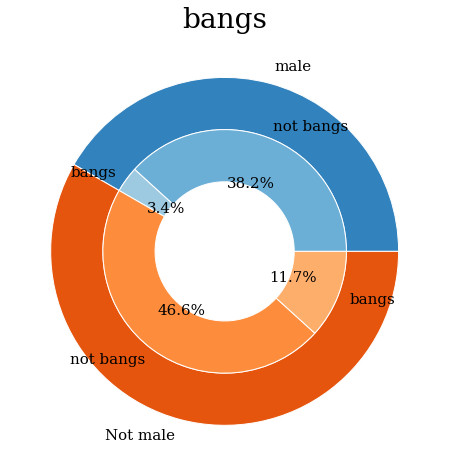

big_lips
Male: (71255,13179)
Female: (82559,35606)
-------------------


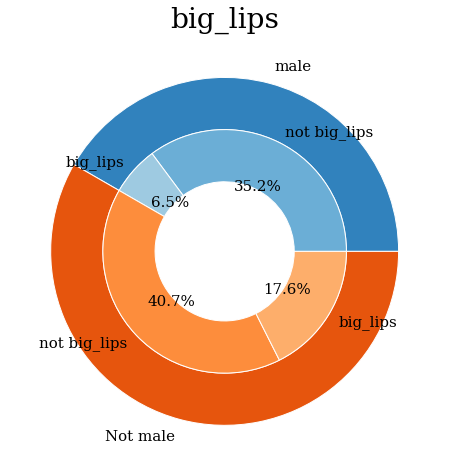

big_nose
Male: (49003,35431)
Female: (106080,12085)
-------------------


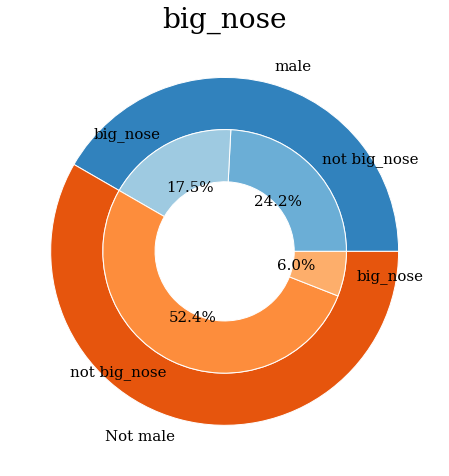

black_hair
Male: (59278,25156)
Female: (94849,23316)
-------------------


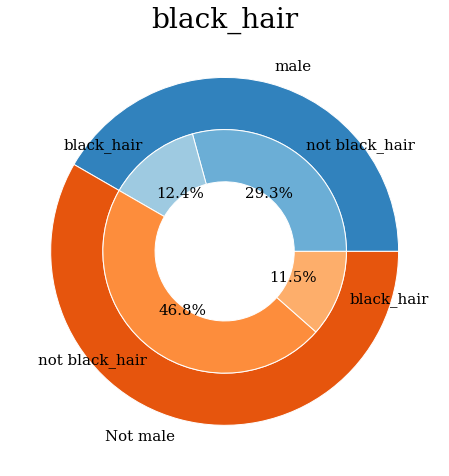

blond_hair
Male: (82685,1749)
Female: (89931,28234)
-------------------


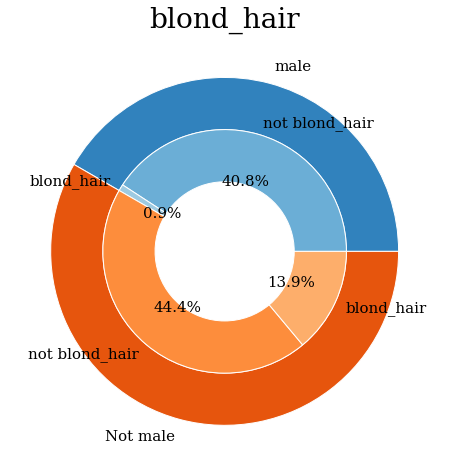

blurry
Male: (79601,4833)
Female: (112686,5479)
-------------------


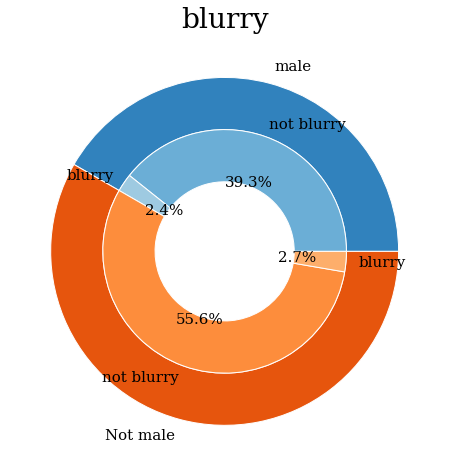

brown_hair
Male: (71646,12788)
Female: (89381,28784)
-------------------


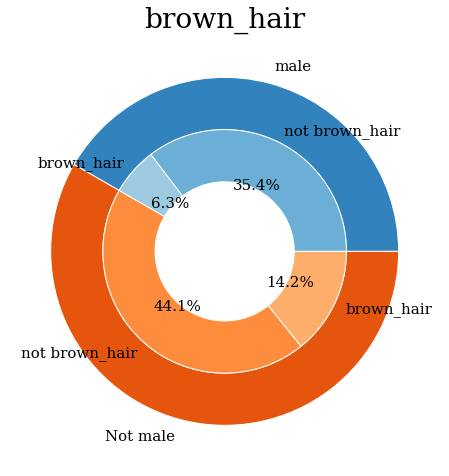

bushy_eyebrows
Male: (63812,20622)
Female: (109984,8181)
-------------------


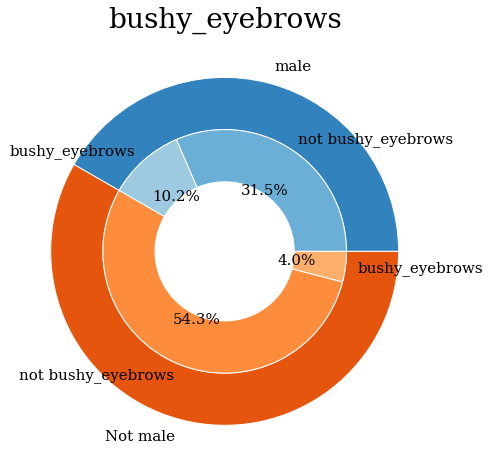

chubby
Male: (74211,10223)
Female: (116725,1440)
-------------------


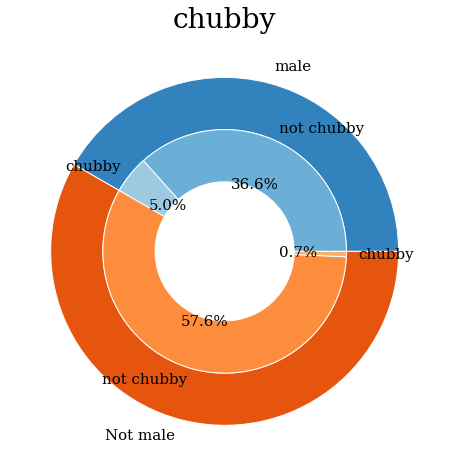

double_chin
Male: (76119,8315)
Female: (117021,1144)
-------------------


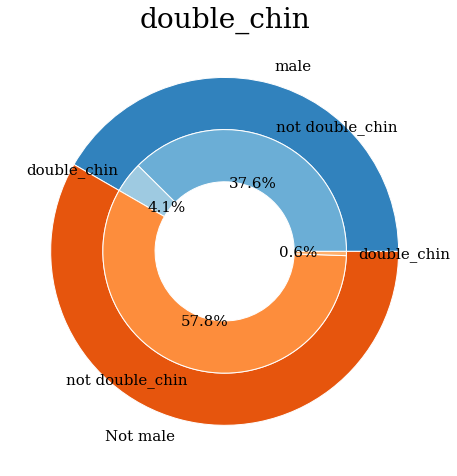

eyeglasses
Male: (73956,10478)
Female: (115450,2715)
-------------------


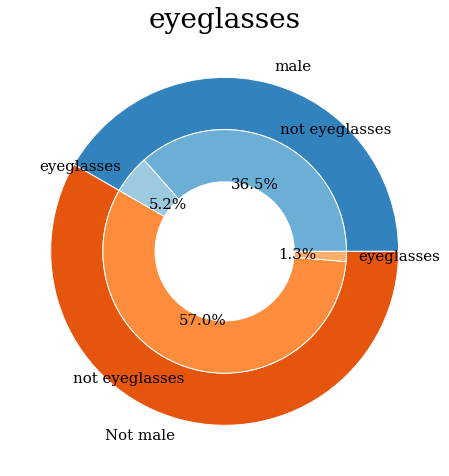

goatee
Male: (71731,12703)
Female: (118152,13)
-------------------


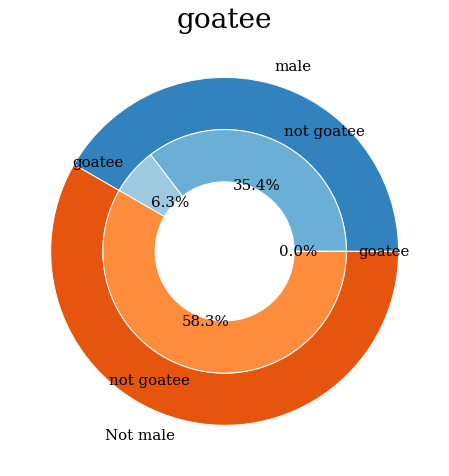

gray_hair
Male: (77199,7235)
Female: (116901,1264)
-------------------


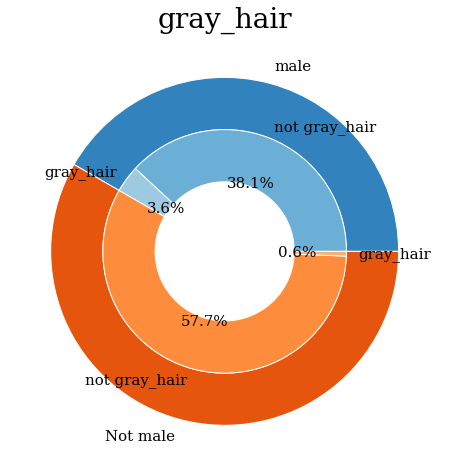

heavy_makeup
Male: (84200,234)
Female: (78156,40009)
-------------------


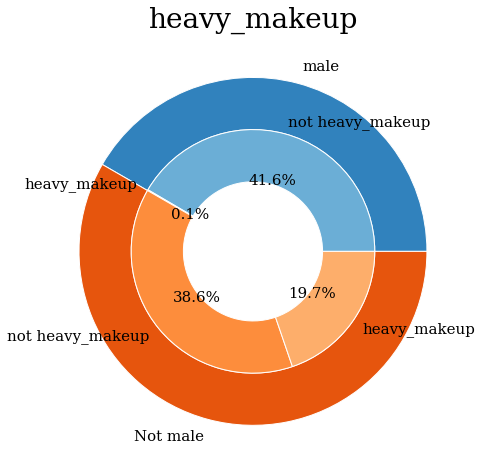

high_cheekbones
Male: (58457,25977)
Female: (66212,51953)
-------------------


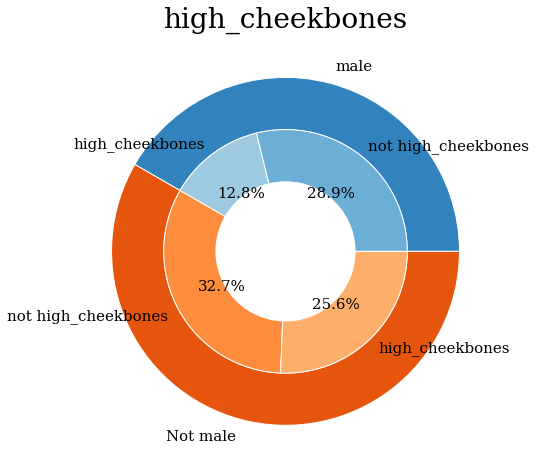

mouth_slightly_open
Male: (48588,35846)
Female: (62096,56069)
-------------------


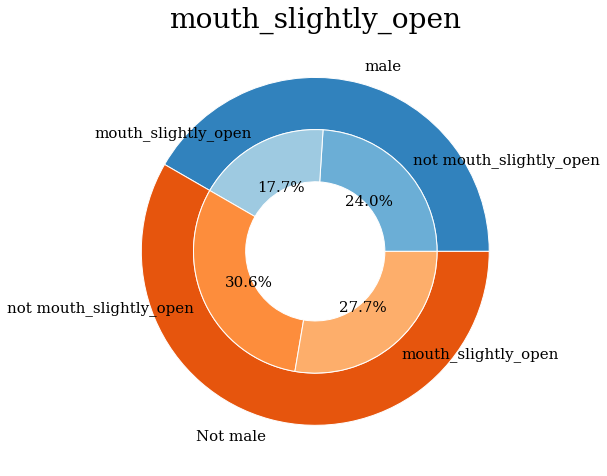

mustache
Male: (76020,8414)
Female: (118162,3)
-------------------


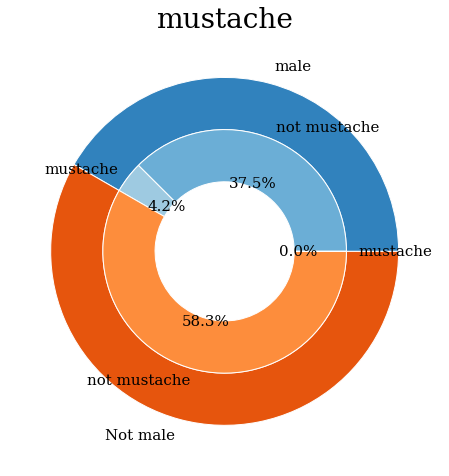

narrow_eyes
Male: (74272,10162)
Female: (104998,13167)
-------------------


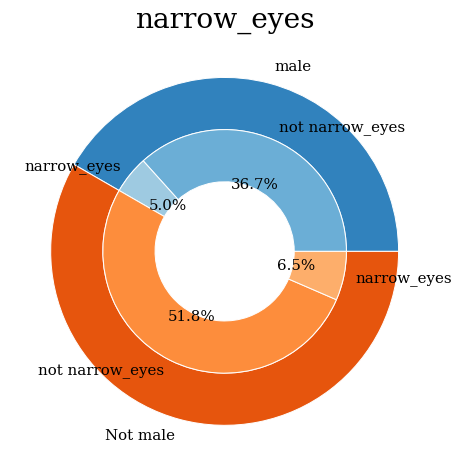

no_beard
Male: (51132,33302)
Female: (118026,139)
-------------------


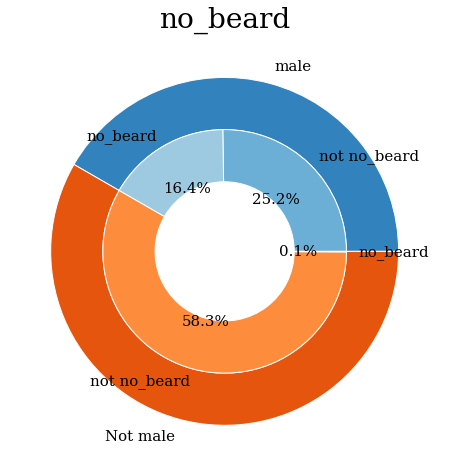

oval_face
Male: (65864,18570)
Female: (79168,38997)
-------------------


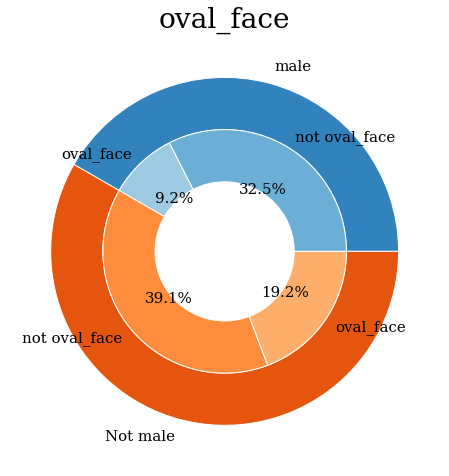

pale_skin
Male: (82378,2056)
Female: (111520,6645)
-------------------


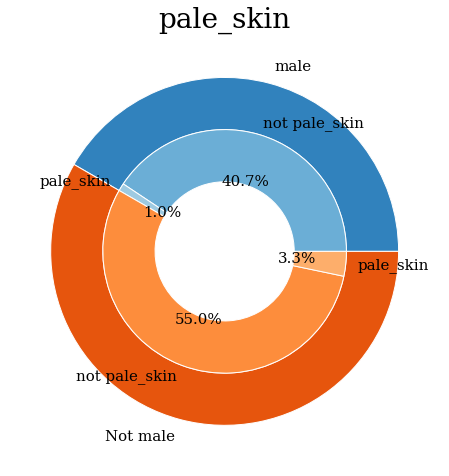

pointy_nose
Male: (70722,13712)
Female: (75667,42498)
-------------------


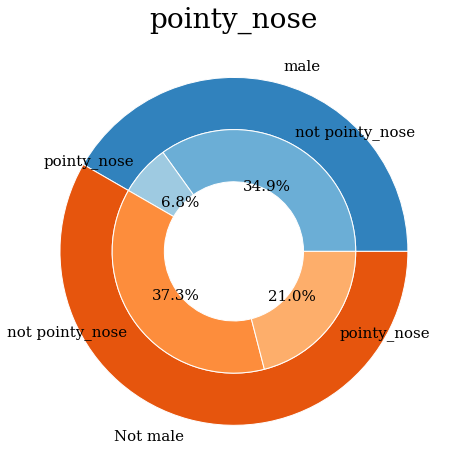

receding_hairline
Male: (74521,9913)
Female: (111915,6250)
-------------------


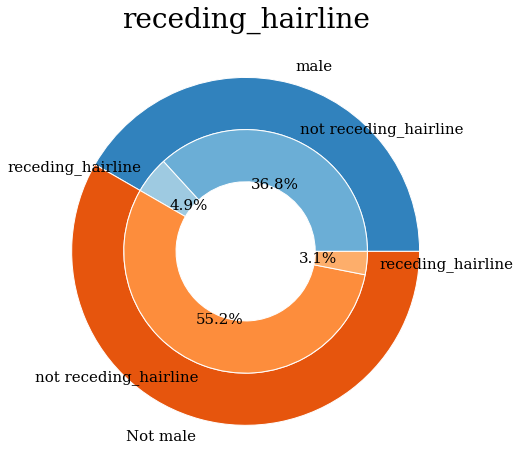

rosy_cheeks
Male: (84180,254)
Female: (105104,13061)
-------------------


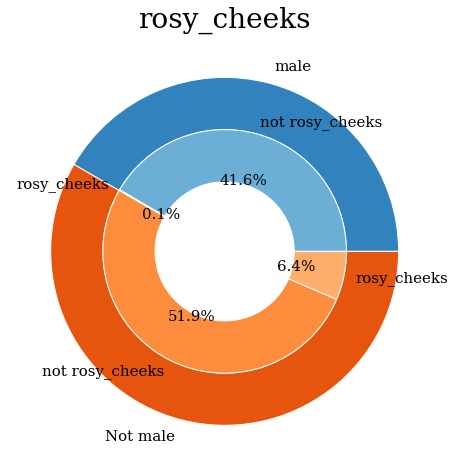

sideburns
Male: (72996,11438)
Female: (118154,11)
-------------------


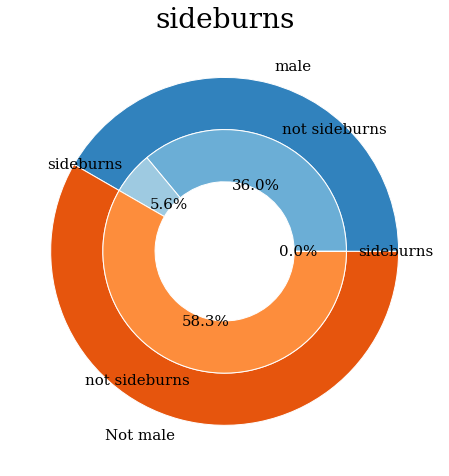

smiling
Male: (50636,33798)
Female: (63871,54294)
-------------------


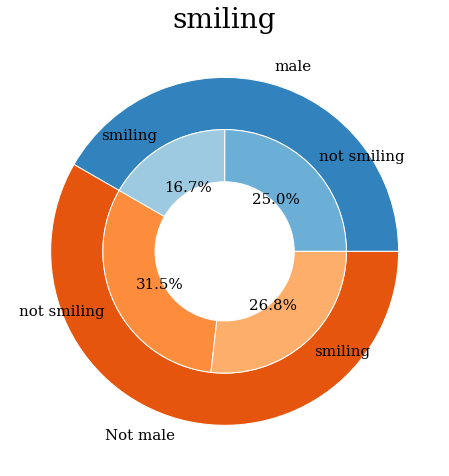

straight_hair
Male: (63963,20471)
Female: (96414,21751)
-------------------


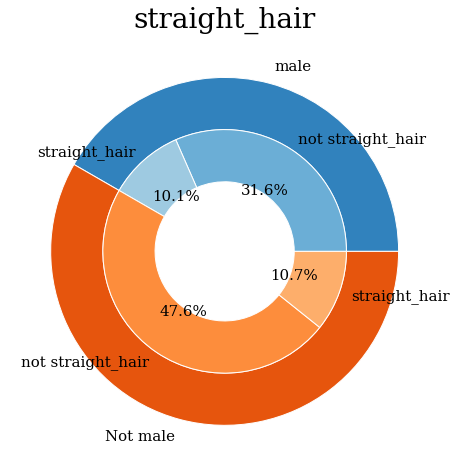

wavy_hair
Male: (72542,11892)
Female: (65313,52852)
-------------------


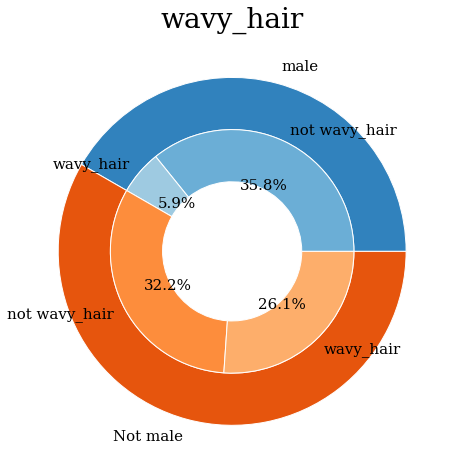

wearing_earrings
Male: (83085,1349)
Female: (81238,36927)
-------------------


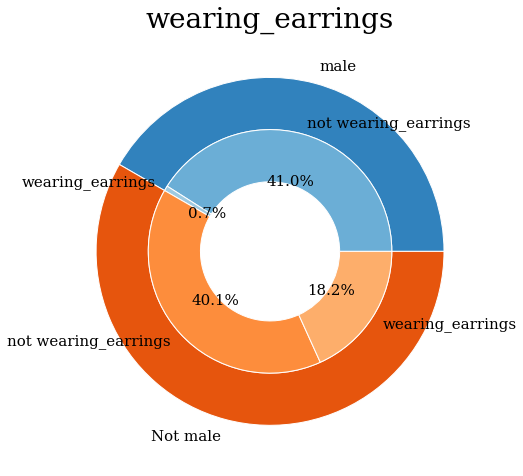

wearing_hat
Male: (77563,6871)
Female: (115218,2947)
-------------------


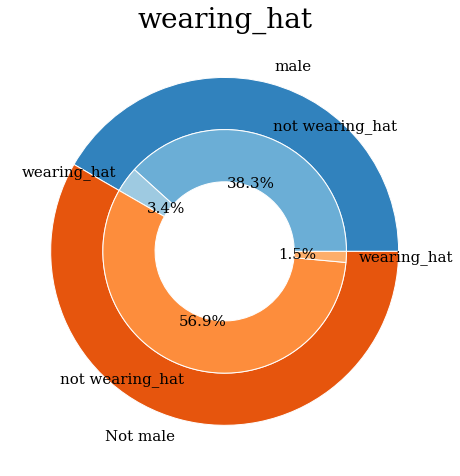

wearing_lipstick
Male: (83911,523)
Female: (95192,22973)
-------------------


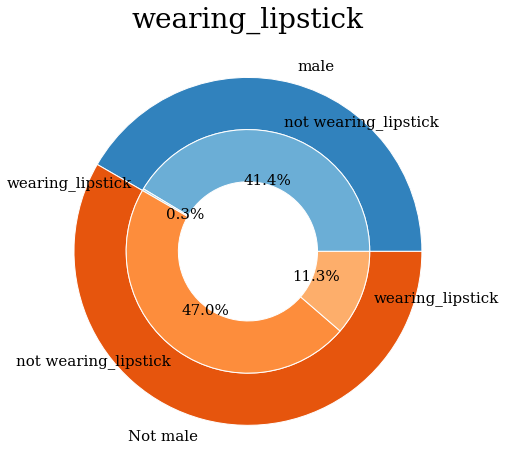

wearing_necklace
Male: (82927,1507)
Female: (94759,23406)
-------------------


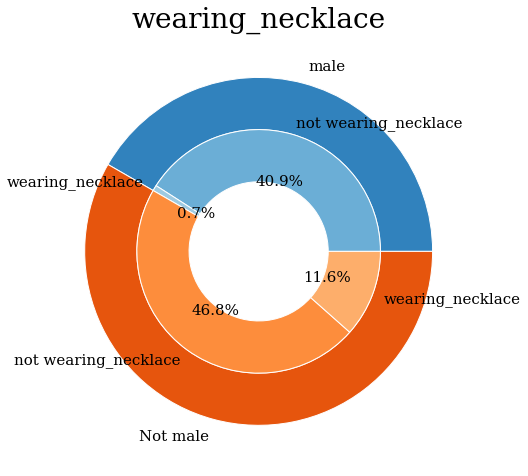

wearing_necktie
Male: (69737,14697)
Female: (118130,35)
-------------------


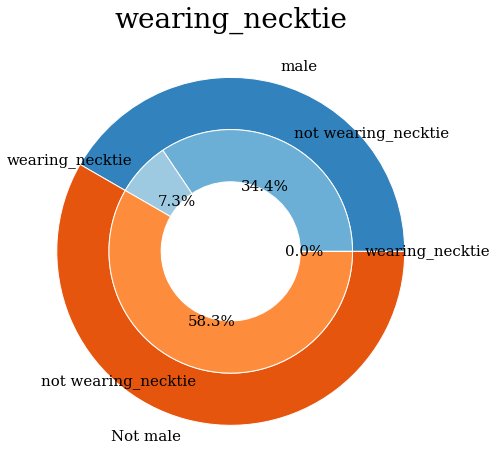

young
Male: (53447,30987)
Female: (103287,14878)
-------------------


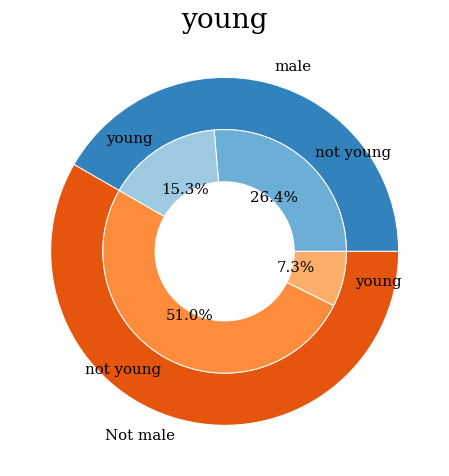

In [9]:
for i in df.columns[1:]:
    if i != 'male':
        plot_pie(df, male_female, i, 'male')
    else: 
        pass

5_o_clock_shadow
Attractive: (94280,9553)
Not Attractive: (85803,12963)
-------------------


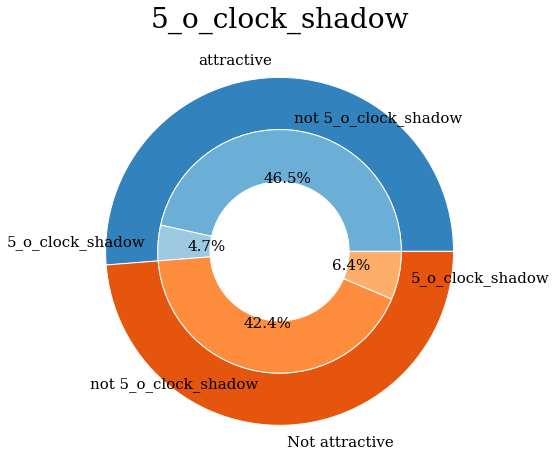

arched_eyebrows
Attractive: (64885,38948)
Not Attractive: (83624,15142)
-------------------


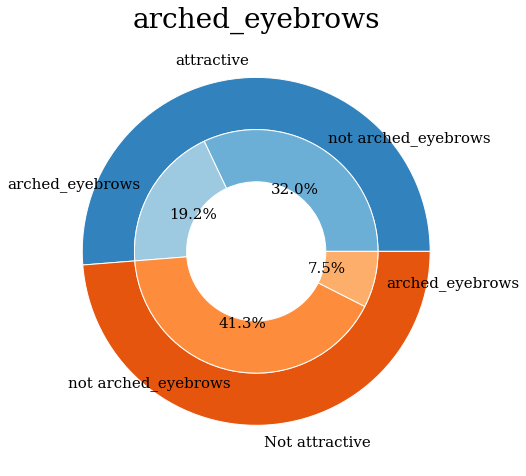

bags_under_eyes
Attractive: (89882,13951)
Not Attractive: (71271,27495)
-------------------


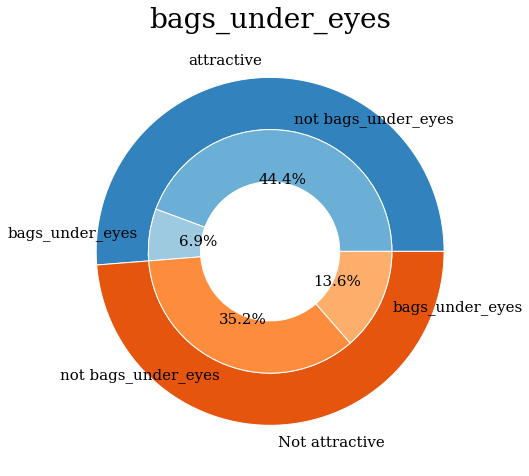

bald
Attractive: (103690,143)
Not Attractive: (94362,4404)
-------------------


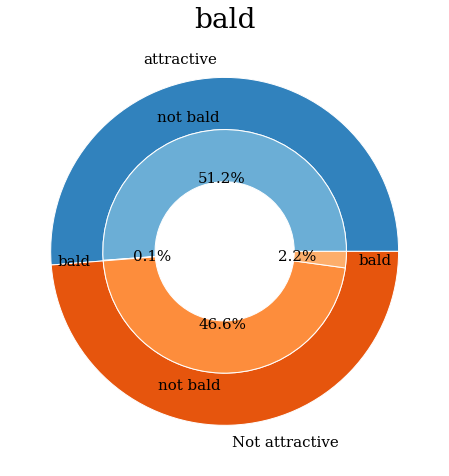

bangs
Attractive: (85926,17907)
Not Attractive: (85964,12802)
-------------------


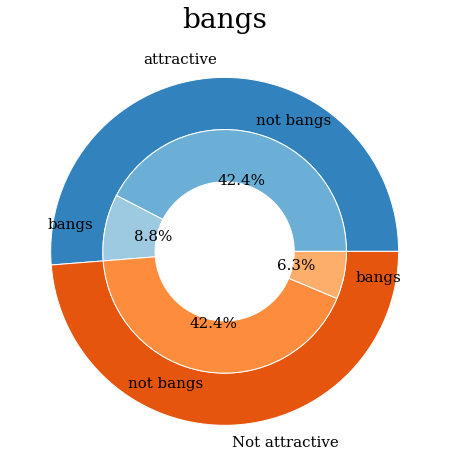

big_lips
Attractive: (76122,27711)
Not Attractive: (77692,21074)
-------------------


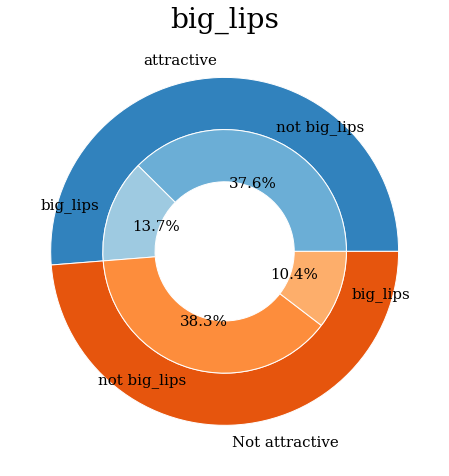

big_nose
Attractive: (91369,12464)
Not Attractive: (63714,35052)
-------------------


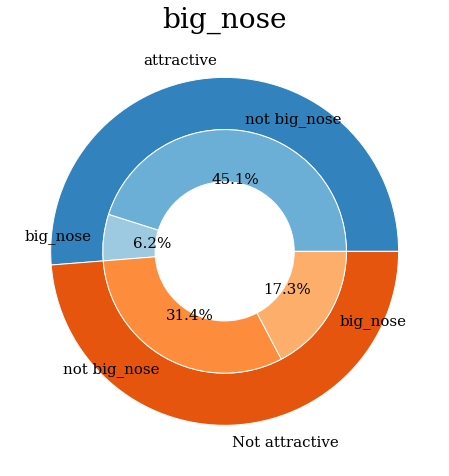

black_hair
Attractive: (78812,25021)
Not Attractive: (75315,23451)
-------------------


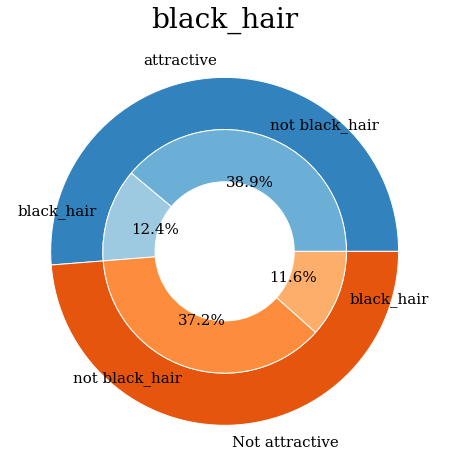

blond_hair
Attractive: (82901,20932)
Not Attractive: (89715,9051)
-------------------


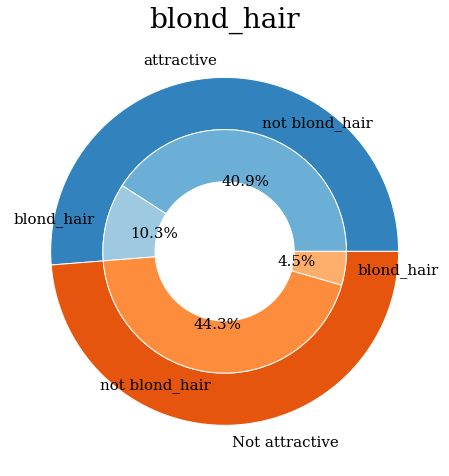

blurry
Attractive: (102576,1257)
Not Attractive: (89711,9055)
-------------------


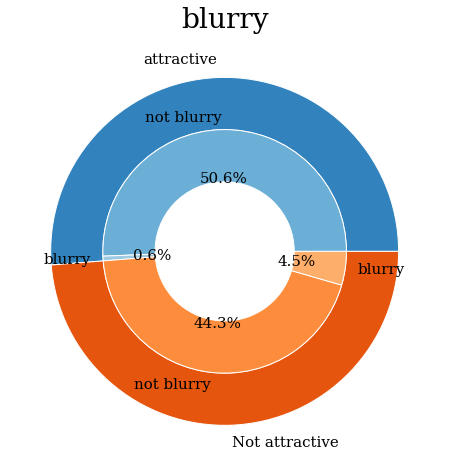

brown_hair
Attractive: (77126,26707)
Not Attractive: (83901,14865)
-------------------


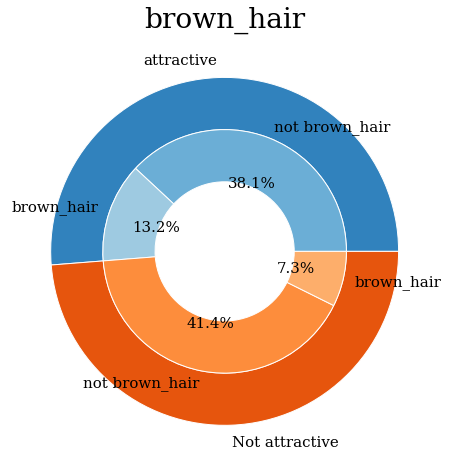

bushy_eyebrows
Attractive: (87576,16257)
Not Attractive: (86220,12546)
-------------------


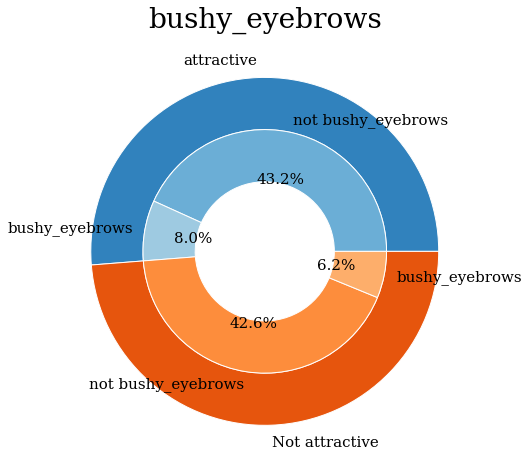

chubby
Attractive: (103443,390)
Not Attractive: (87493,11273)
-------------------


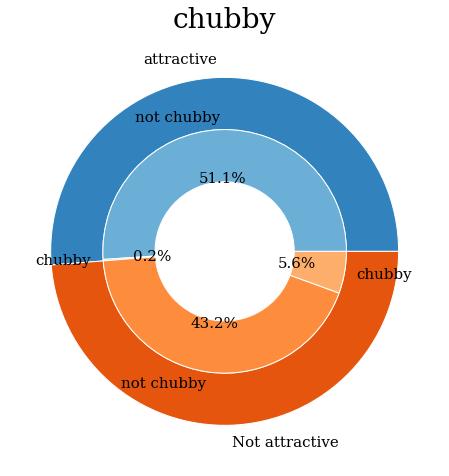

double_chin
Attractive: (103450,383)
Not Attractive: (89690,9076)
-------------------


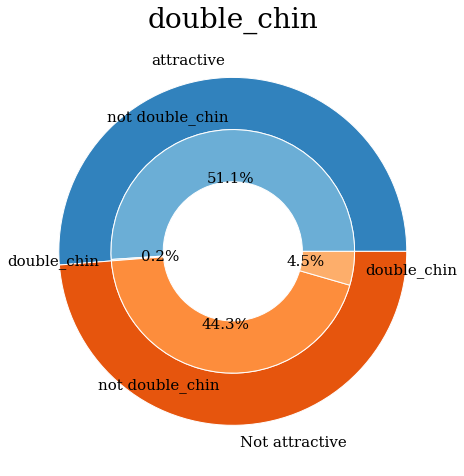

eyeglasses
Attractive: (102636,1197)
Not Attractive: (86770,11996)
-------------------


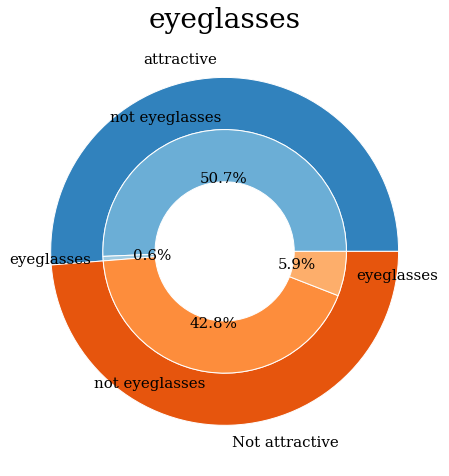

goatee
Attractive: (100917,2916)
Not Attractive: (88966,9800)
-------------------


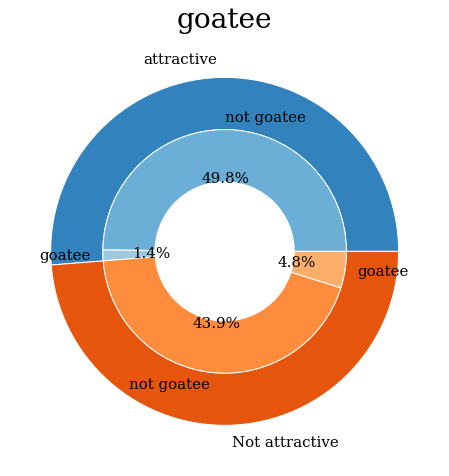

gray_hair
Attractive: (103574,259)
Not Attractive: (90526,8240)
-------------------


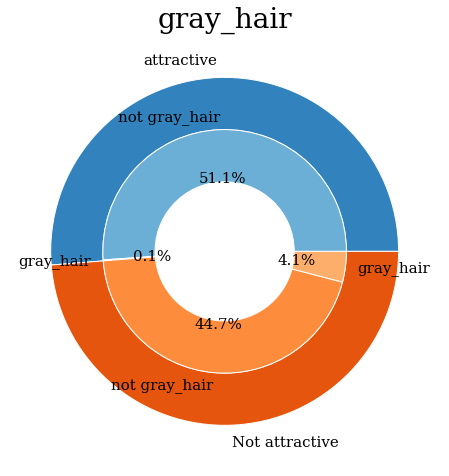

heavy_makeup
Attractive: (63706,40127)
Not Attractive: (84082,14684)
-------------------


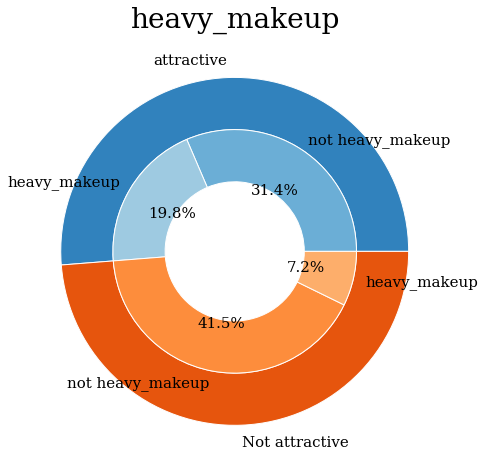

high_cheekbones
Attractive: (54766,49067)
Not Attractive: (61343,37423)
-------------------


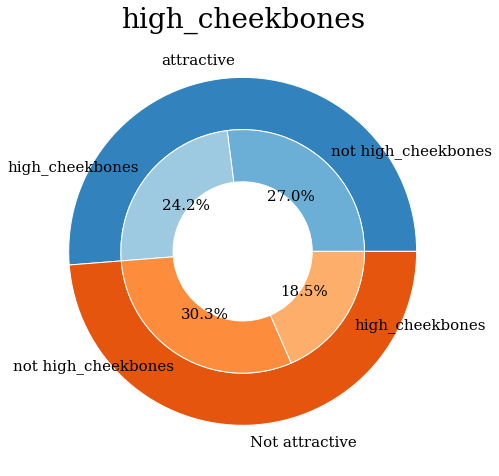

male
Attractive: (80254,23579)
Not Attractive: (60855,37911)
-------------------


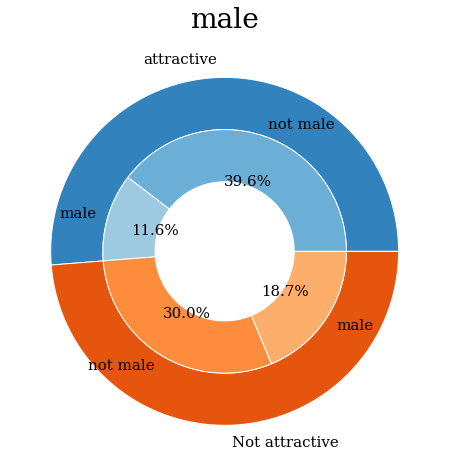

mouth_slightly_open
Attractive: (52551,51282)
Not Attractive: (52106,46660)
-------------------


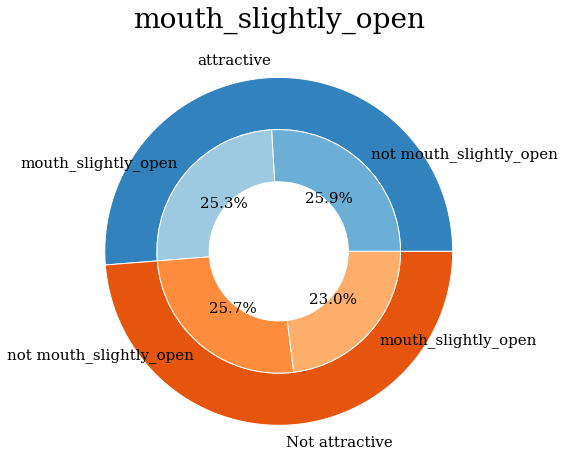

mustache
Attractive: (102352,1481)
Not Attractive: (91830,6936)
-------------------


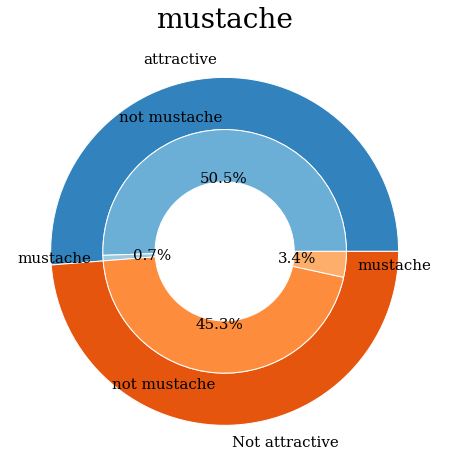

narrow_eyes
Attractive: (94265,9568)
Not Attractive: (85005,13761)
-------------------


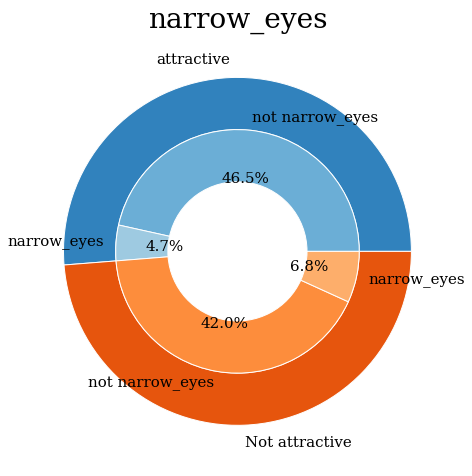

no_beard
Attractive: (94125,9708)
Not Attractive: (75033,23733)
-------------------


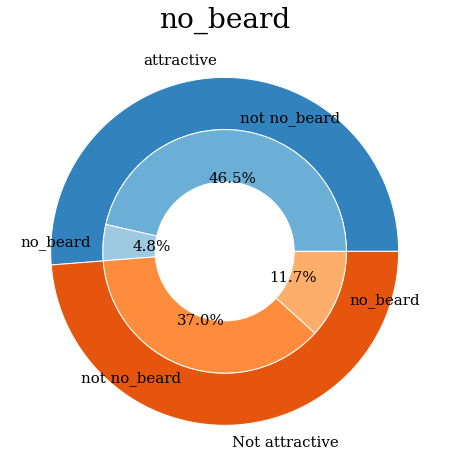

oval_face
Attractive: (65472,38361)
Not Attractive: (79560,19206)
-------------------


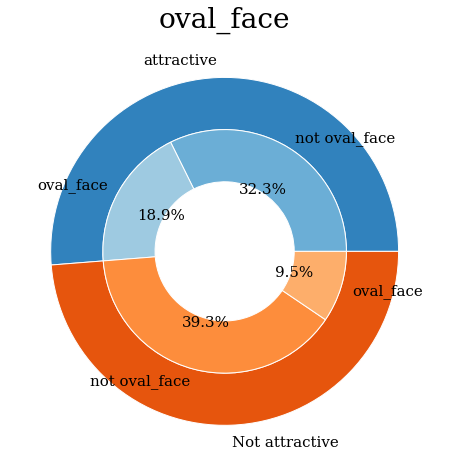

pale_skin
Attractive: (97607,6226)
Not Attractive: (96291,2475)
-------------------


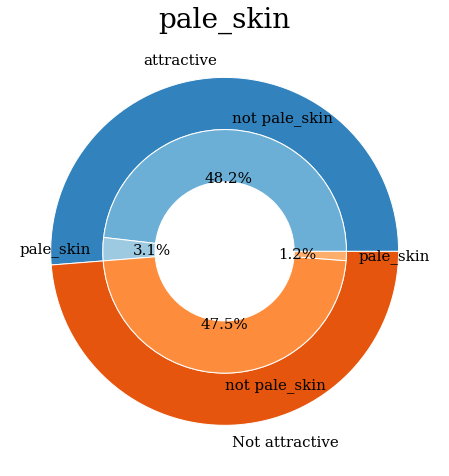

pointy_nose
Attractive: (64674,39159)
Not Attractive: (81715,17051)
-------------------


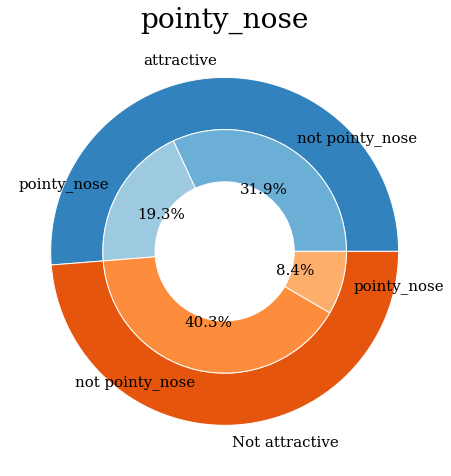

receding_hairline
Attractive: (100452,3381)
Not Attractive: (85984,12782)
-------------------


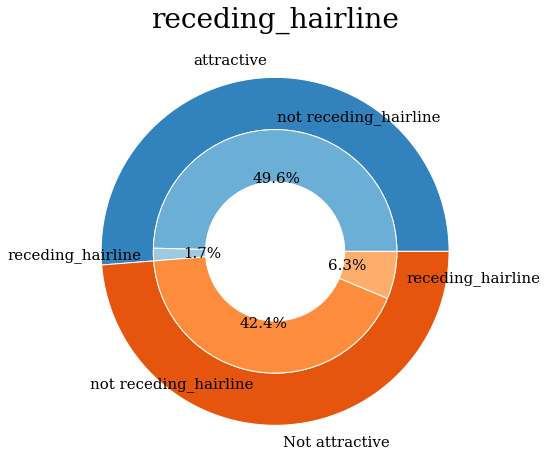

rosy_cheeks
Attractive: (92897,10936)
Not Attractive: (96387,2379)
-------------------


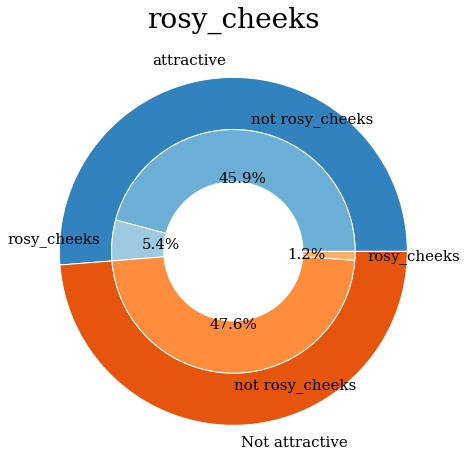

sideburns
Attractive: (100309,3524)
Not Attractive: (90841,7925)
-------------------


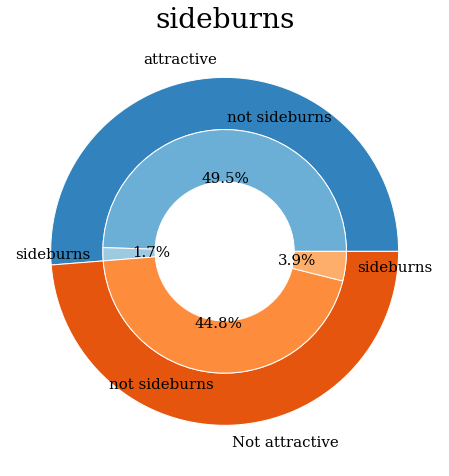

smiling
Attractive: (57537,46296)
Not Attractive: (58634,40132)
-------------------


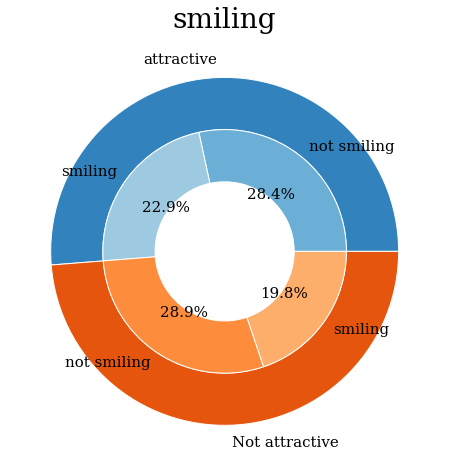

straight_hair
Attractive: (80485,23348)
Not Attractive: (79892,18874)
-------------------


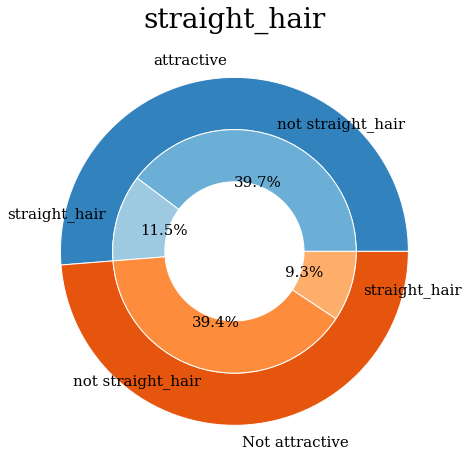

wavy_hair
Attractive: (60499,43334)
Not Attractive: (77356,21410)
-------------------


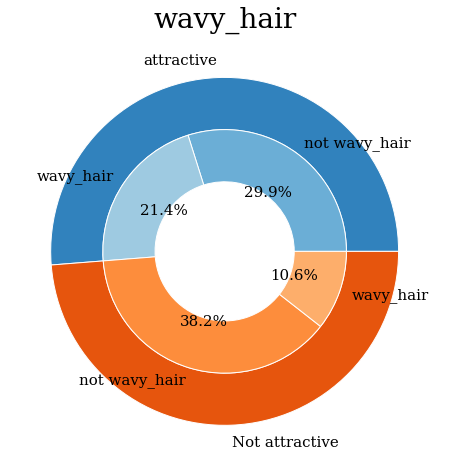

wearing_earrings
Attractive: (79287,24546)
Not Attractive: (85036,13730)
-------------------


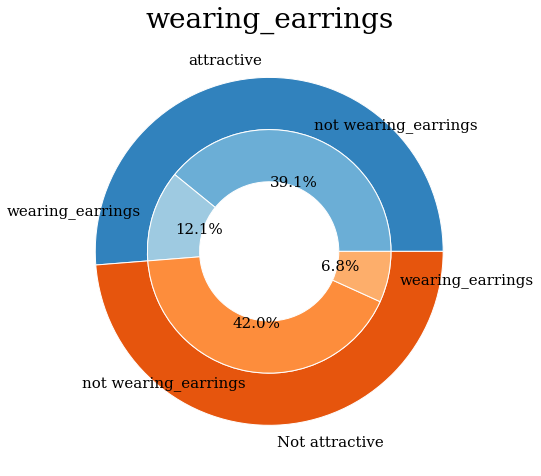

wearing_hat
Attractive: (101816,2017)
Not Attractive: (90965,7801)
-------------------


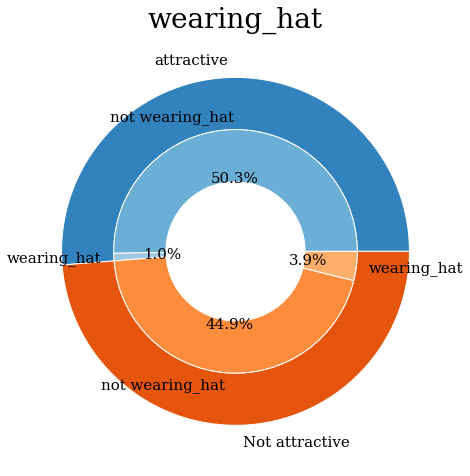

wearing_lipstick
Attractive: (73327,30506)
Not Attractive: (76378,22388)
-------------------


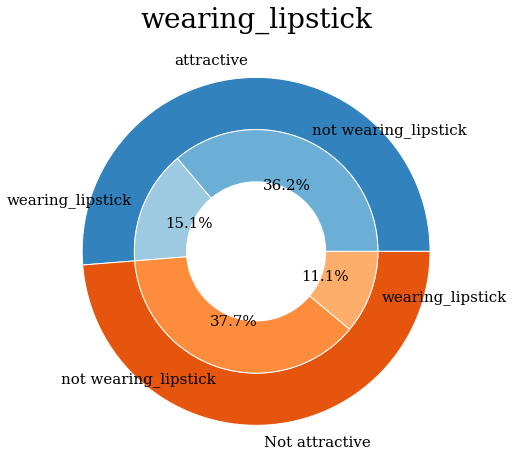

wearing_necklace
Attractive: (88779,15054)
Not Attractive: (88907,9859)
-------------------


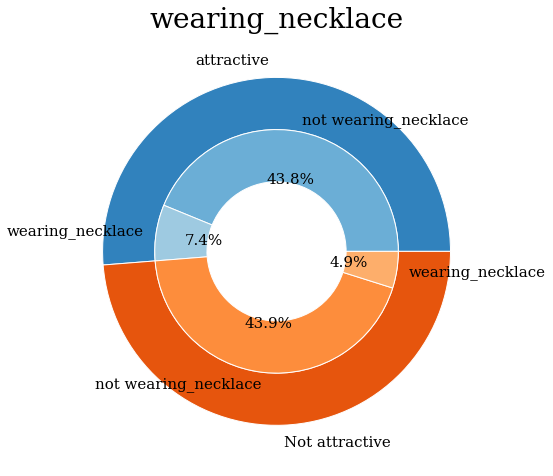

wearing_necktie
Attractive: (100396,3437)
Not Attractive: (87471,11295)
-------------------


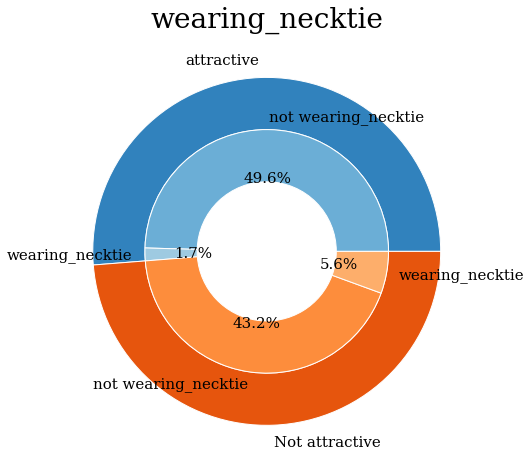

young
Attractive: (96759,7074)
Not Attractive: (59975,38791)
-------------------


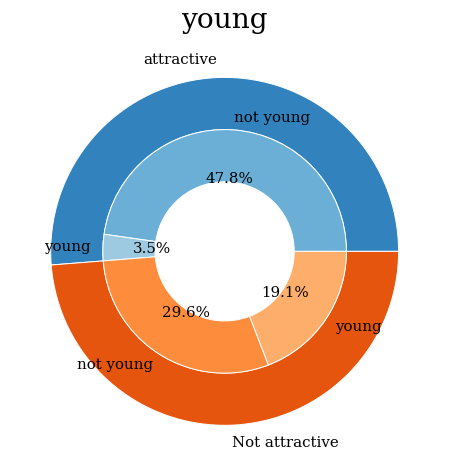

In [10]:
for i in df.columns[1:]:
    if i != 'attractive':
        plot_pie(df, attractive, i, 'attractive')
    else: 
        pass

5_o_clock_shadow
Attractive: (14038,9541)
Not Attractive: (47900,12955)
-------------------


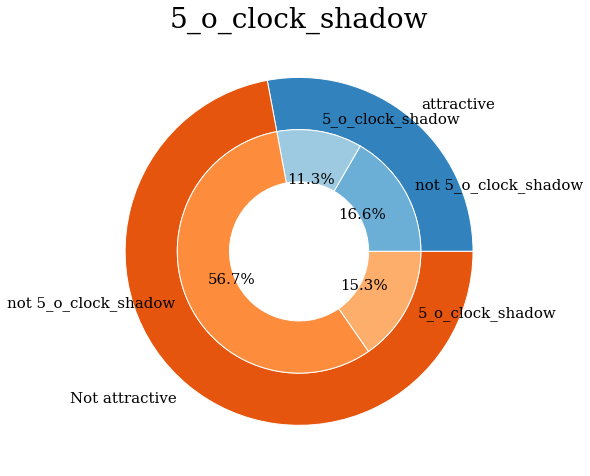

arched_eyebrows
Attractive: (21919,1660)
Not Attractive: (58002,2853)
-------------------


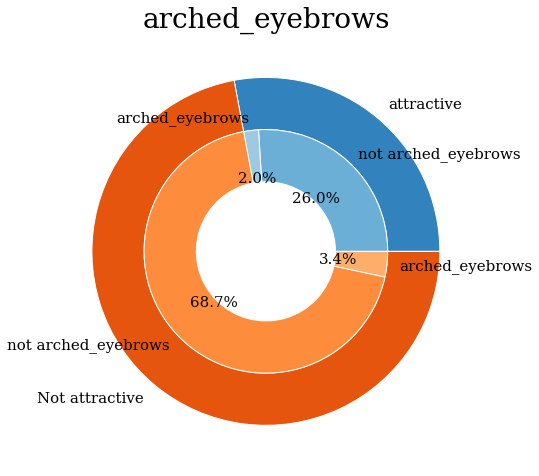

bags_under_eyes
Attractive: (15917,7662)
Not Attractive: (39113,21742)
-------------------


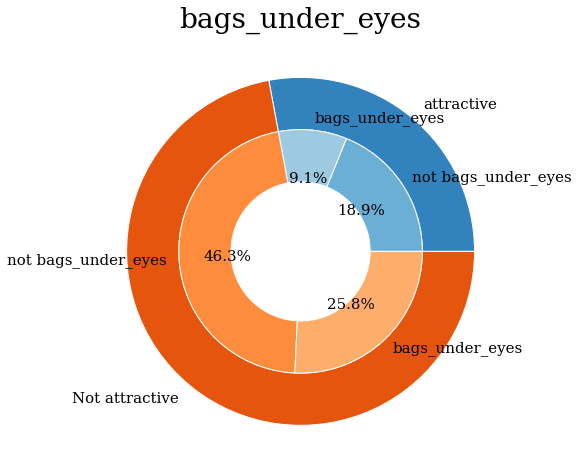

bald
Attractive: (23437,142)
Not Attractive: (56467,4388)
-------------------


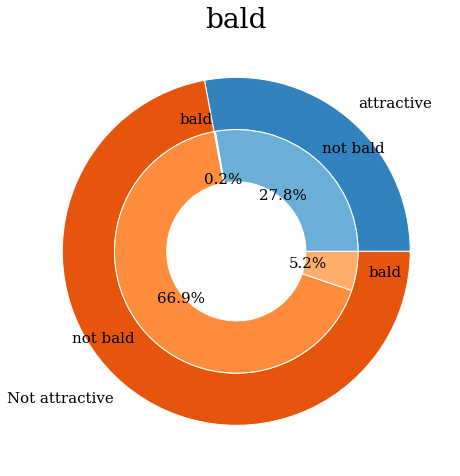

bangs
Attractive: (20588,2991)
Not Attractive: (56896,3959)
-------------------


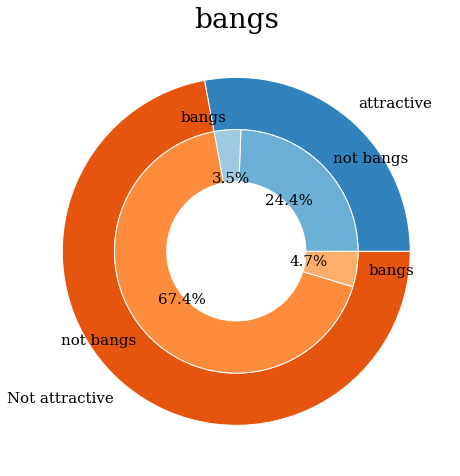

big_lips
Attractive: (20355,3224)
Not Attractive: (50900,9955)
-------------------


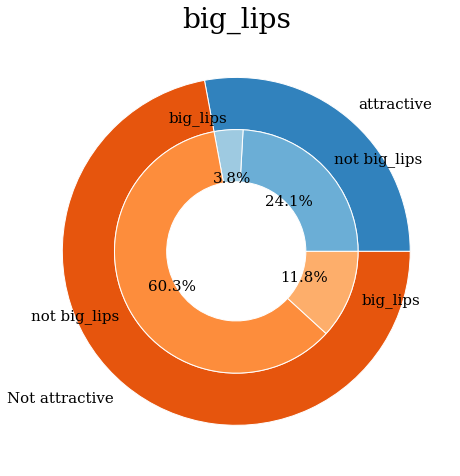

big_nose
Attractive: (16594,6985)
Not Attractive: (32409,28446)
-------------------


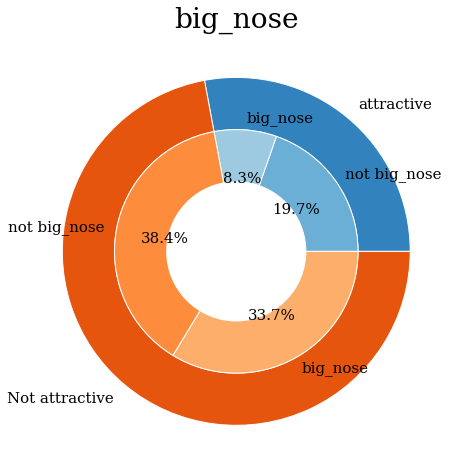

black_hair
Attractive: (14308,9271)
Not Attractive: (44970,15885)
-------------------


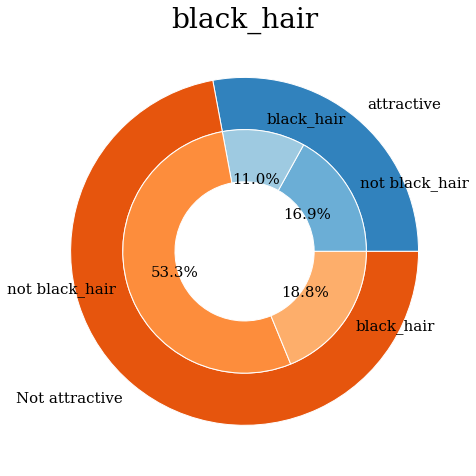

blond_hair
Attractive: (23028,551)
Not Attractive: (59657,1198)
-------------------


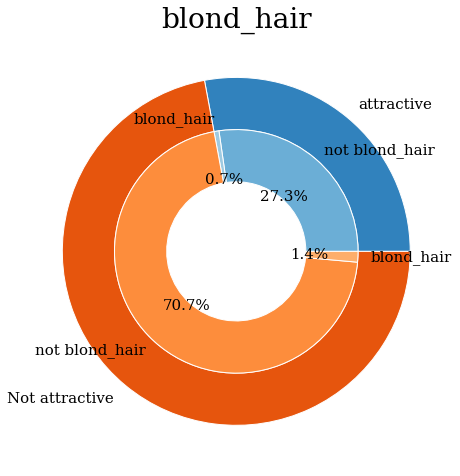

blurry
Attractive: (23407,172)
Not Attractive: (56194,4661)
-------------------


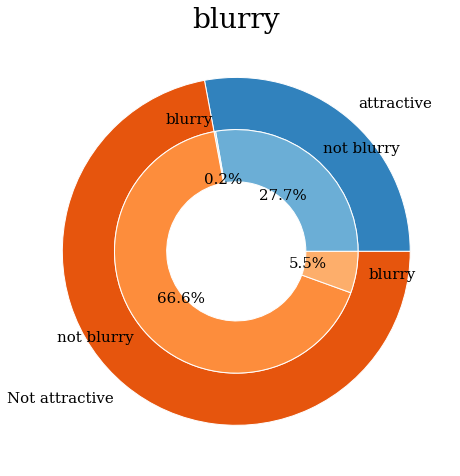

brown_hair
Attractive: (17989,5590)
Not Attractive: (53657,7198)
-------------------


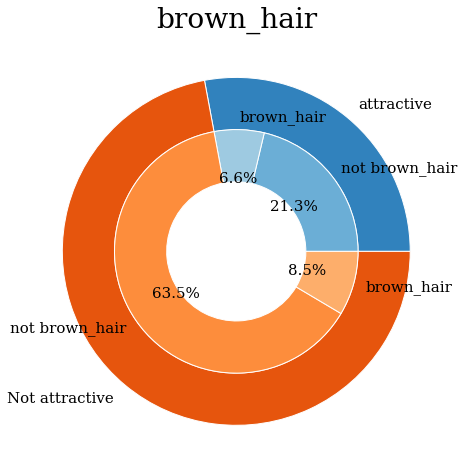

bushy_eyebrows
Attractive: (14125,9454)
Not Attractive: (49687,11168)
-------------------


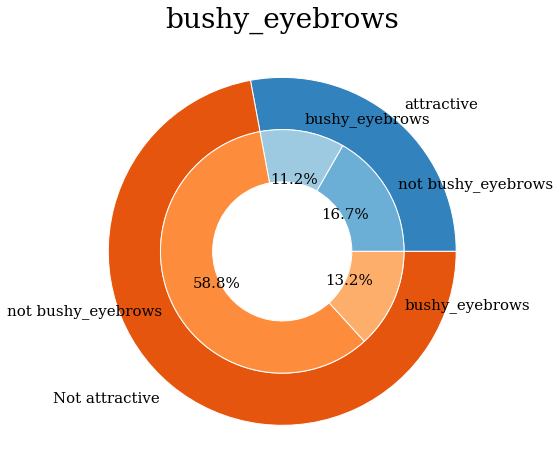

chubby
Attractive: (23378,201)
Not Attractive: (50833,10022)
-------------------


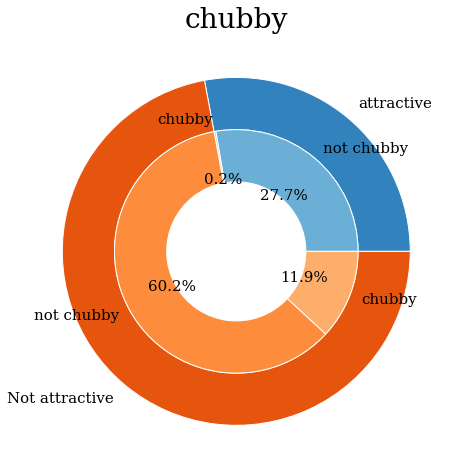

double_chin
Attractive: (23329,250)
Not Attractive: (52790,8065)
-------------------


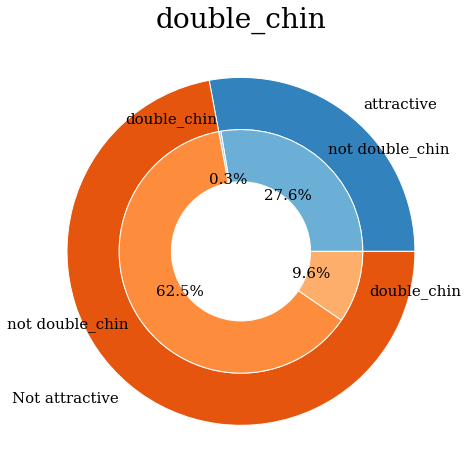

eyeglasses
Attractive: (22951,628)
Not Attractive: (51005,9850)
-------------------


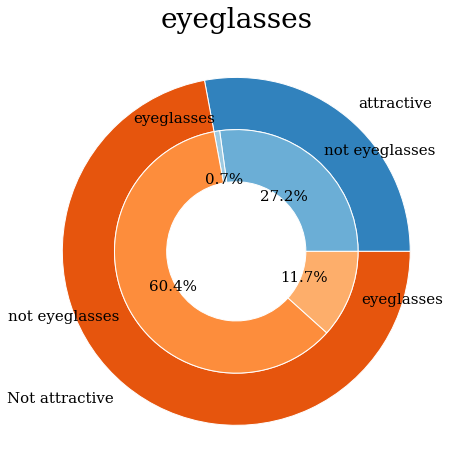

goatee
Attractive: (20669,2910)
Not Attractive: (51062,9793)
-------------------


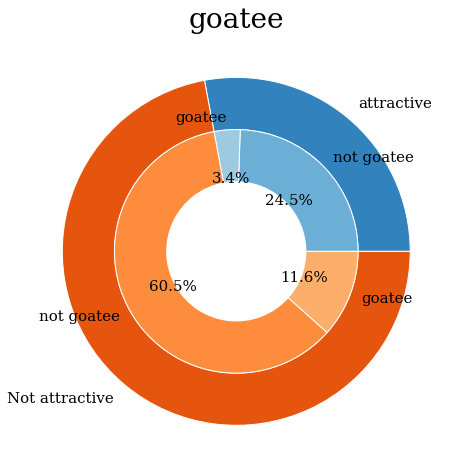

gray_hair
Attractive: (23469,110)
Not Attractive: (53730,7125)
-------------------


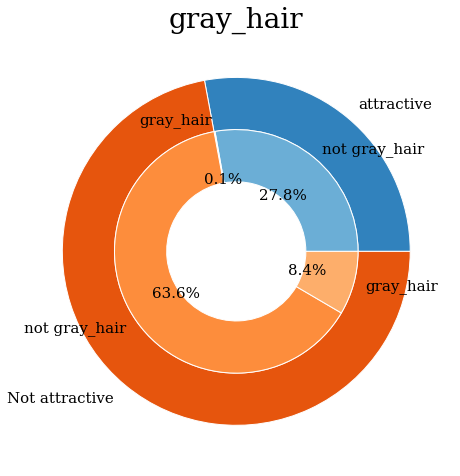

heavy_makeup
Attractive: (23447,132)
Not Attractive: (60753,102)
-------------------


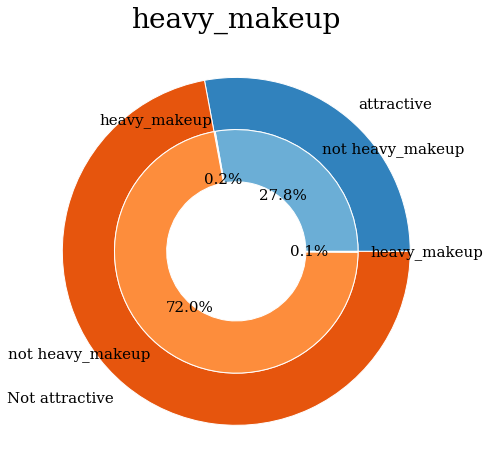

high_cheekbones
Attractive: (16259,7320)
Not Attractive: (42198,18657)
-------------------


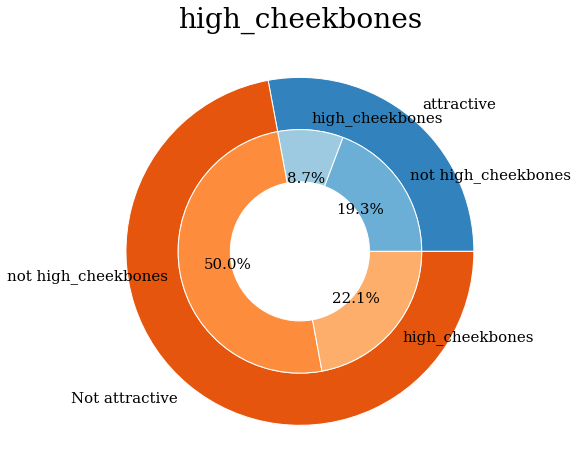

mouth_slightly_open
Attractive: (14113,9466)
Not Attractive: (34475,26380)
-------------------


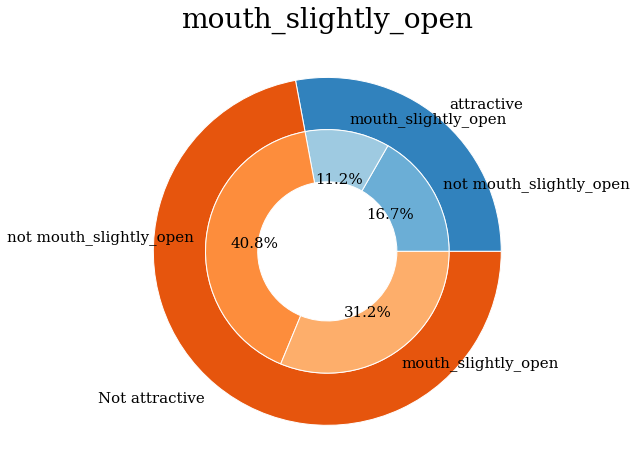

mustache
Attractive: (22098,1481)
Not Attractive: (53922,6933)
-------------------


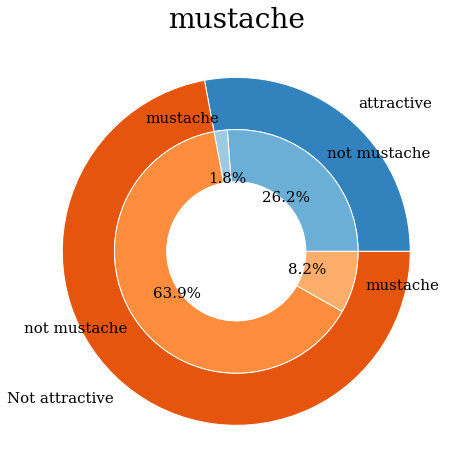

narrow_eyes
Attractive: (21209,2370)
Not Attractive: (53063,7792)
-------------------


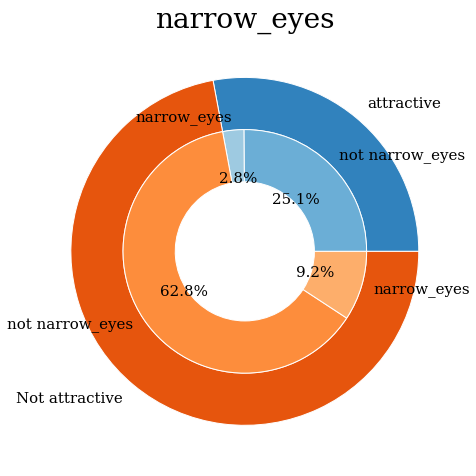

no_beard
Attractive: (13918,9661)
Not Attractive: (37214,23641)
-------------------


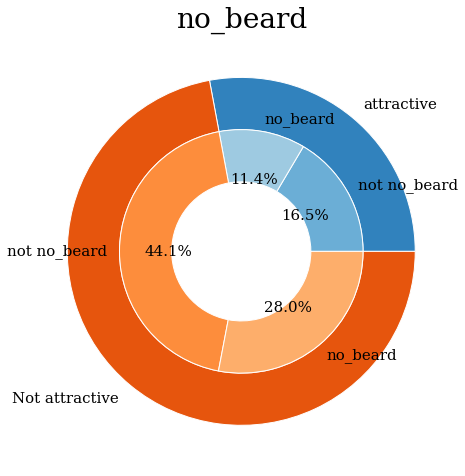

oval_face
Attractive: (17084,6495)
Not Attractive: (48780,12075)
-------------------


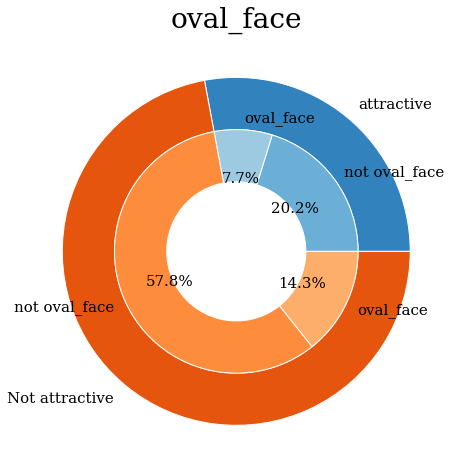

pale_skin
Attractive: (22531,1048)
Not Attractive: (59847,1008)
-------------------


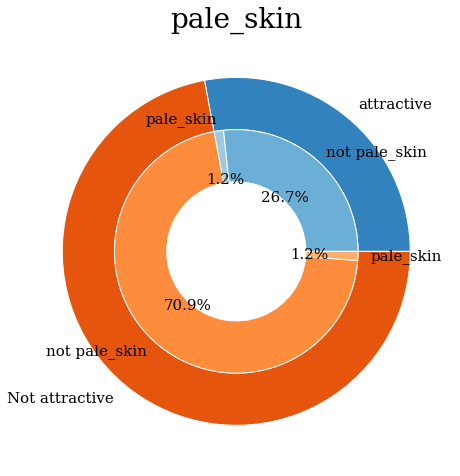

pointy_nose
Attractive: (17847,5732)
Not Attractive: (52875,7980)
-------------------


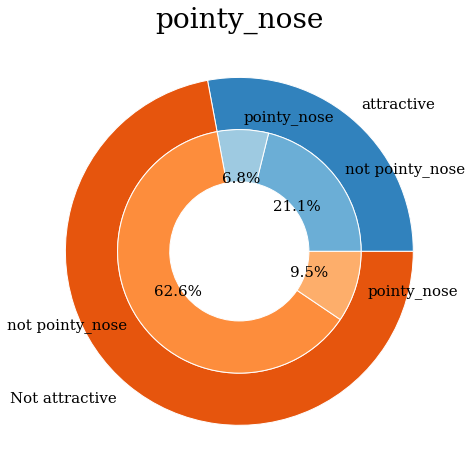

receding_hairline
Attractive: (22986,593)
Not Attractive: (51535,9320)
-------------------


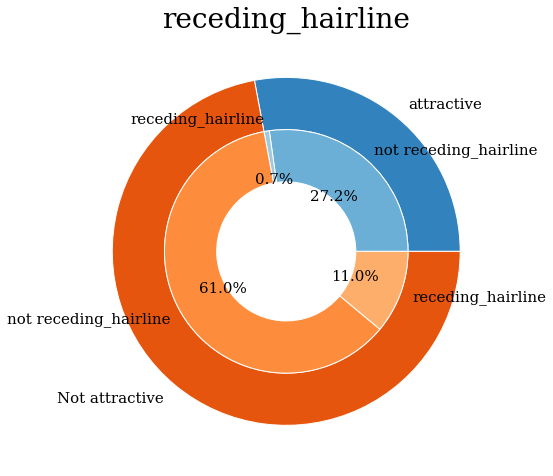

rosy_cheeks
Attractive: (23508,71)
Not Attractive: (60672,183)
-------------------


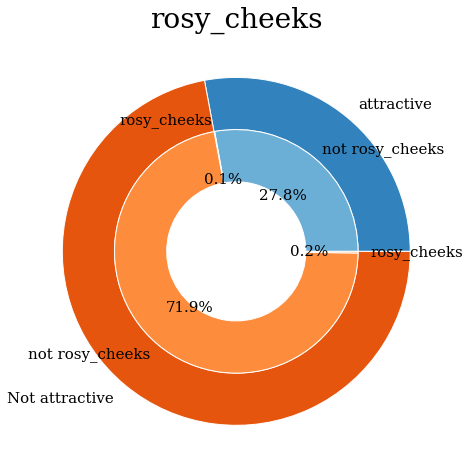

sideburns
Attractive: (20058,3521)
Not Attractive: (52938,7917)
-------------------


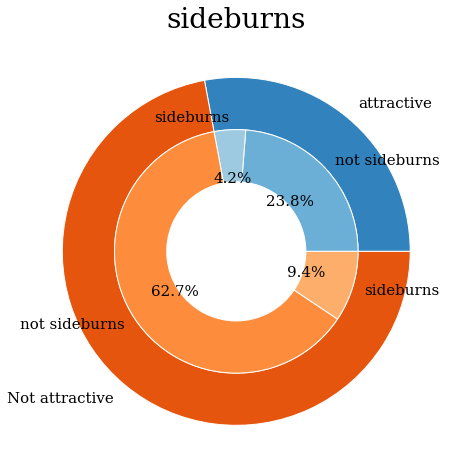

smiling
Attractive: (12210,11369)
Not Attractive: (38426,22429)
-------------------


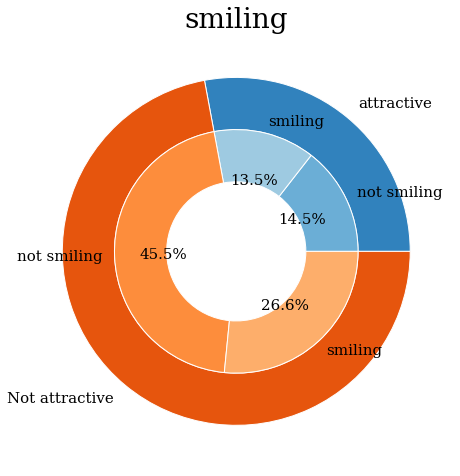

straight_hair
Attractive: (15538,8041)
Not Attractive: (48425,12430)
-------------------


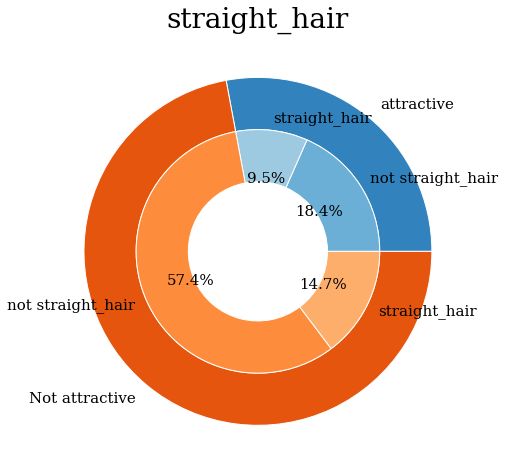

wavy_hair
Attractive: (19225,4354)
Not Attractive: (53317,7538)
-------------------


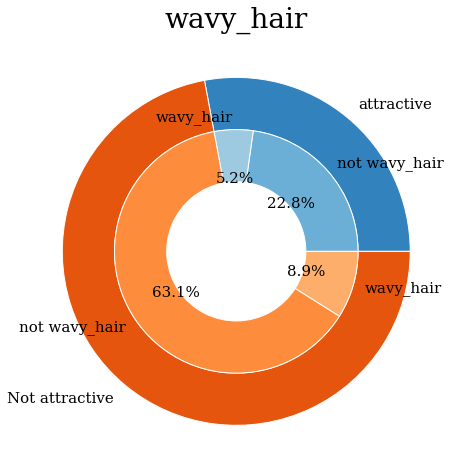

wearing_earrings
Attractive: (23388,191)
Not Attractive: (59697,1158)
-------------------


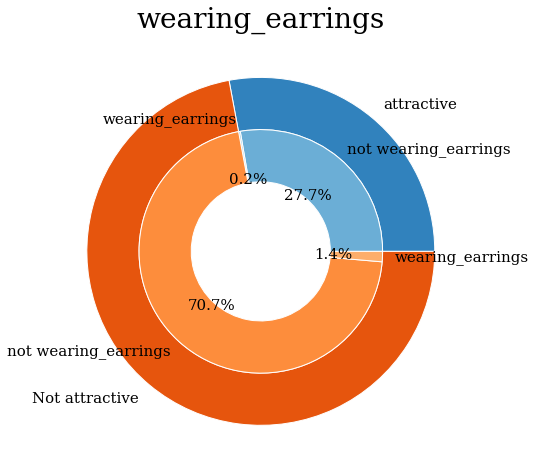

wearing_hat
Attractive: (22630,949)
Not Attractive: (54933,5922)
-------------------


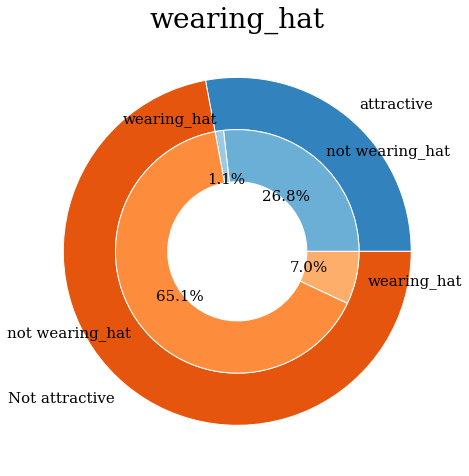

wearing_lipstick
Attractive: (23255,324)
Not Attractive: (60656,199)
-------------------


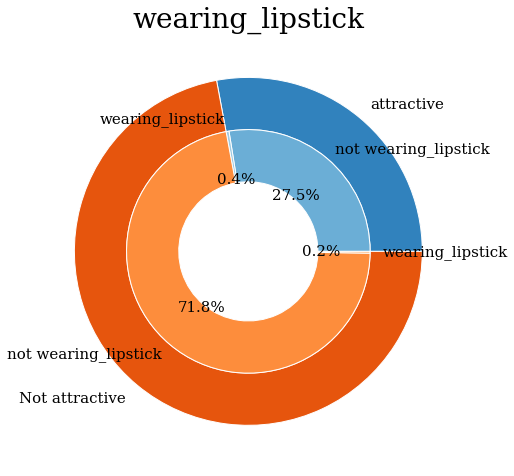

wearing_necklace
Attractive: (23184,395)
Not Attractive: (59743,1112)
-------------------


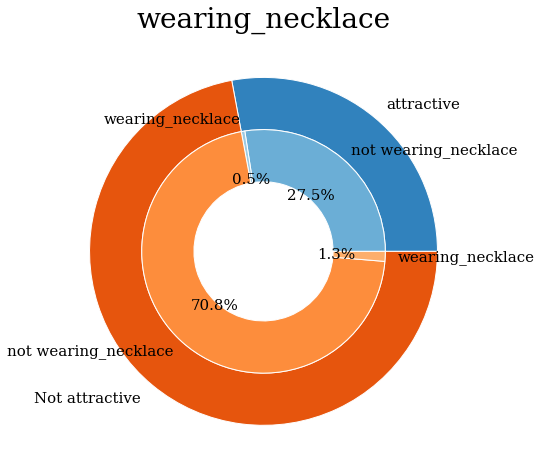

wearing_necktie
Attractive: (20156,3423)
Not Attractive: (49581,11274)
-------------------


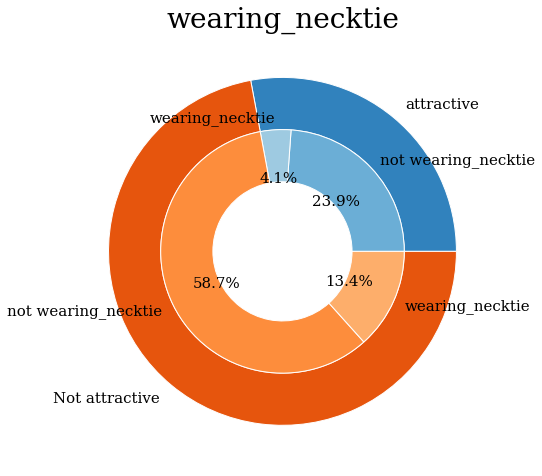

young
Attractive: (21371,2208)
Not Attractive: (32076,28779)
-------------------


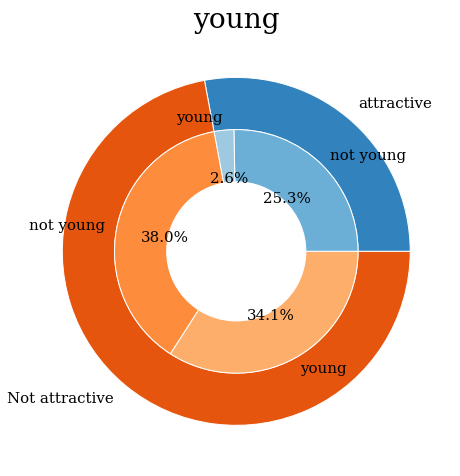

In [16]:
for i in male_df.columns[1:]:
    if i != 'attractive':
        plot_pie(male_df, attractive, i, 'attractive')
    else: 
        pass

5_o_clock_shadow
Attractive: (80242,12)
Not Attractive: (37903,8)
-------------------


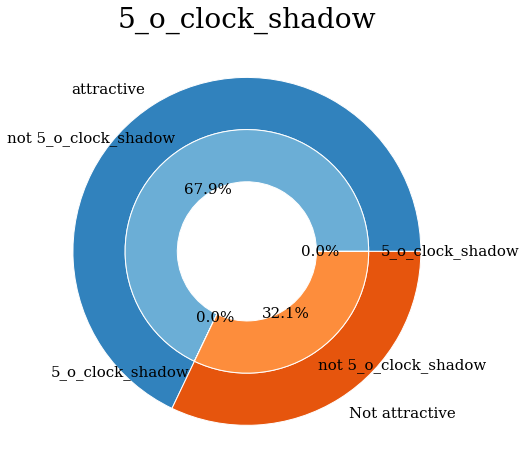

arched_eyebrows
Attractive: (42966,37288)
Not Attractive: (25622,12289)
-------------------


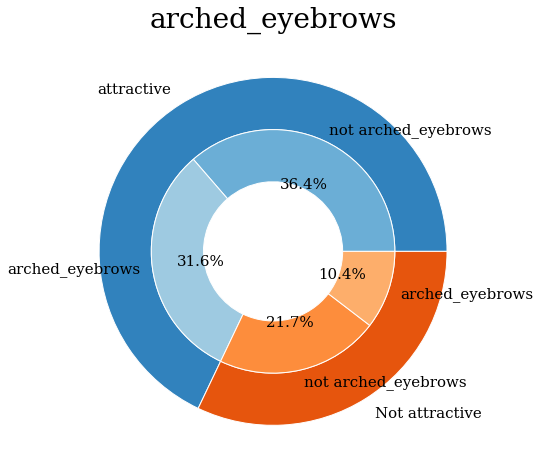

bags_under_eyes
Attractive: (73965,6289)
Not Attractive: (32158,5753)
-------------------


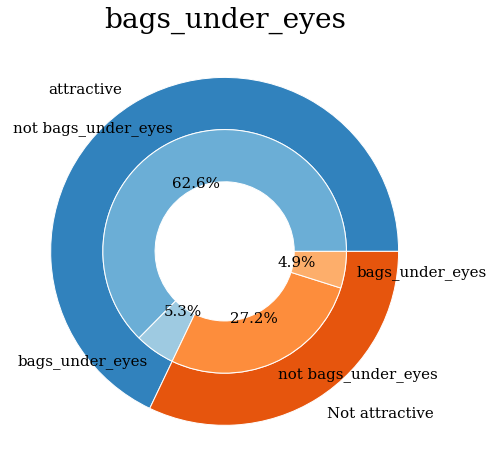

bald
Attractive: (80253,1)
Not Attractive: (37895,16)
-------------------


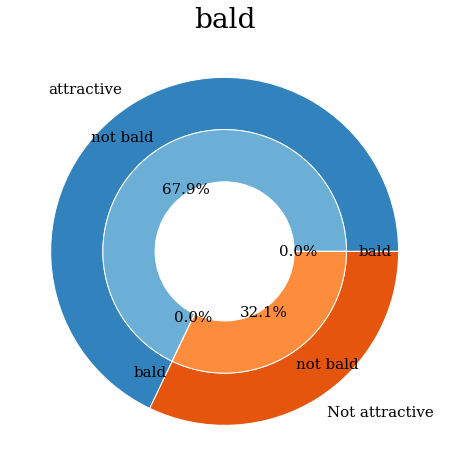

bangs
Attractive: (65338,14916)
Not Attractive: (29068,8843)
-------------------


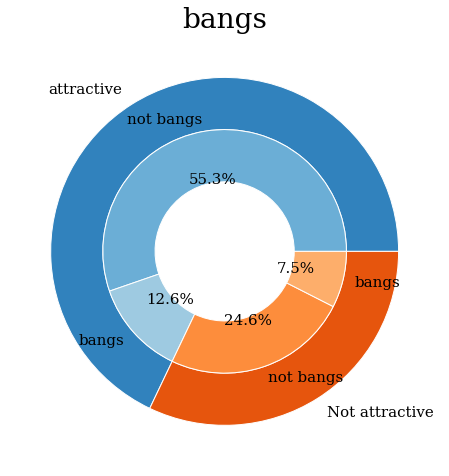

big_lips
Attractive: (55767,24487)
Not Attractive: (26792,11119)
-------------------


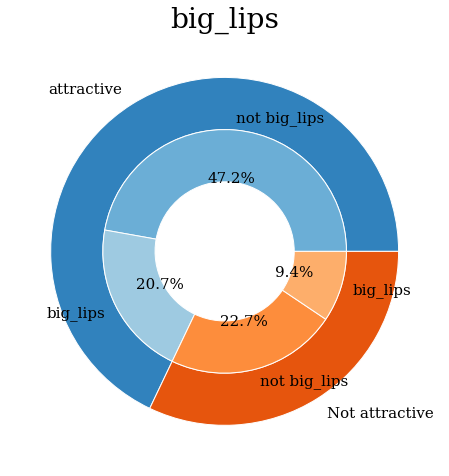

big_nose
Attractive: (74775,5479)
Not Attractive: (31305,6606)
-------------------


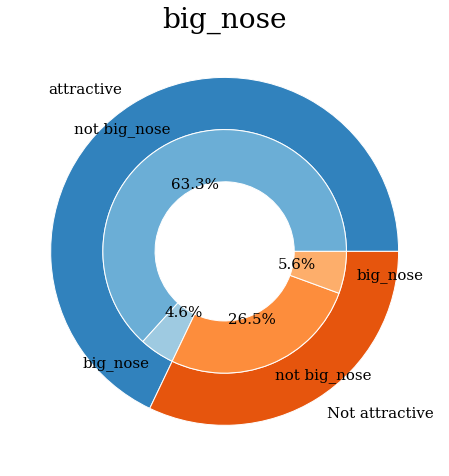

black_hair
Attractive: (64504,15750)
Not Attractive: (30345,7566)
-------------------


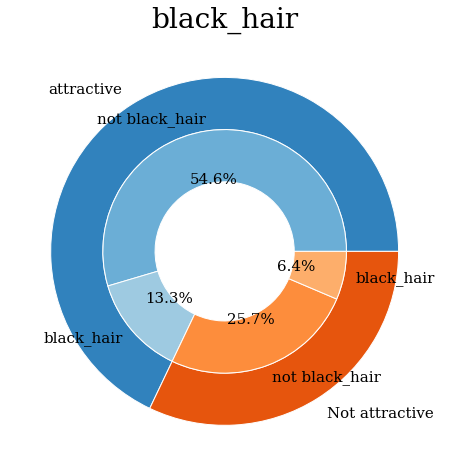

blond_hair
Attractive: (59873,20381)
Not Attractive: (30058,7853)
-------------------


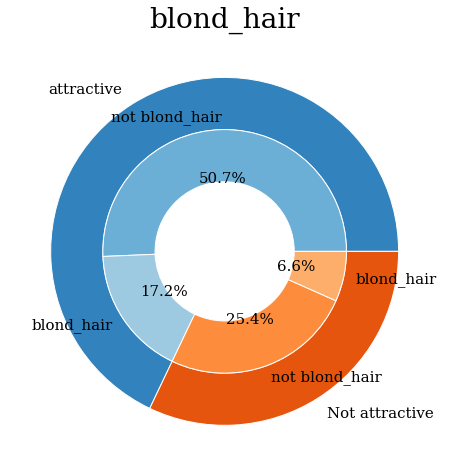

blurry
Attractive: (79169,1085)
Not Attractive: (33517,4394)
-------------------


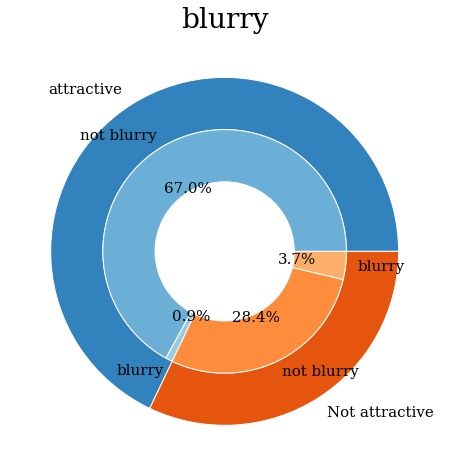

brown_hair
Attractive: (59137,21117)
Not Attractive: (30244,7667)
-------------------


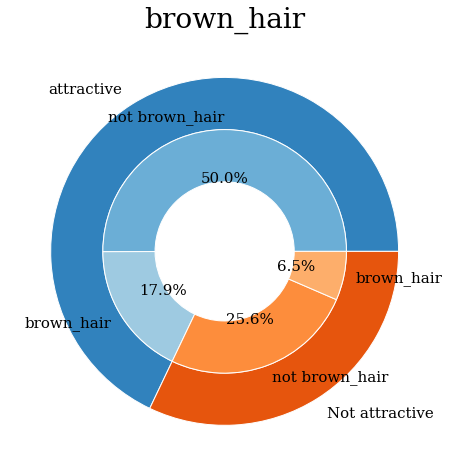

bushy_eyebrows
Attractive: (73451,6803)
Not Attractive: (36533,1378)
-------------------


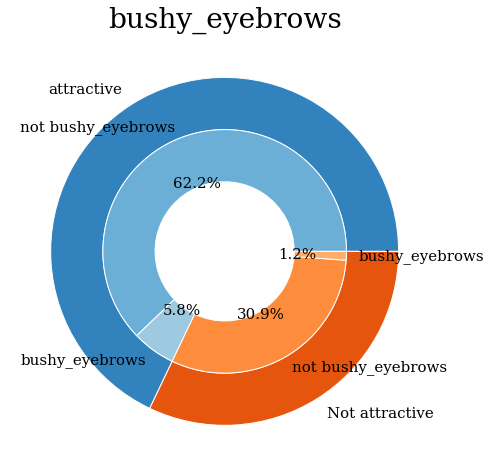

chubby
Attractive: (80065,189)
Not Attractive: (36660,1251)
-------------------


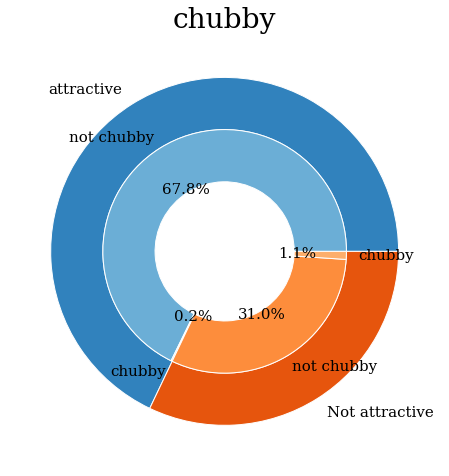

double_chin
Attractive: (80121,133)
Not Attractive: (36900,1011)
-------------------


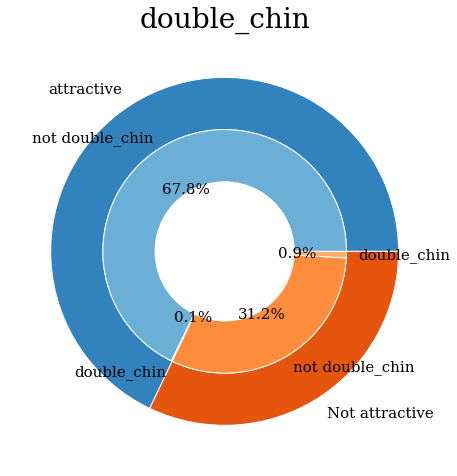

eyeglasses
Attractive: (79685,569)
Not Attractive: (35765,2146)
-------------------


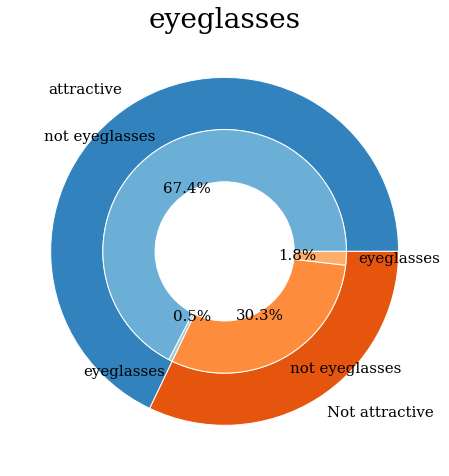

goatee
Attractive: (80248,6)
Not Attractive: (37904,7)
-------------------


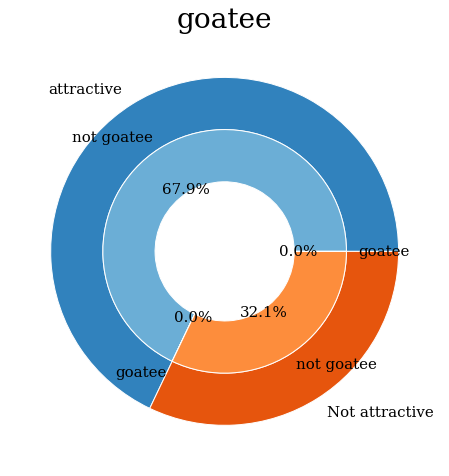

gray_hair
Attractive: (80105,149)
Not Attractive: (36796,1115)
-------------------


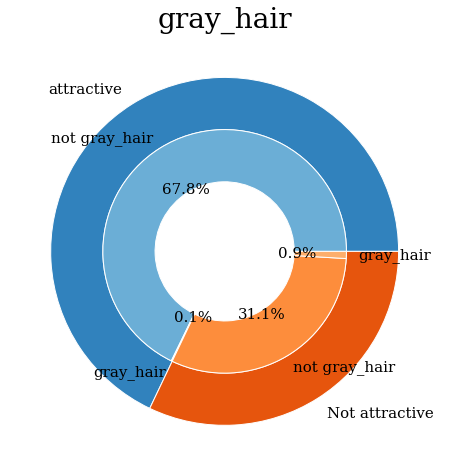

heavy_makeup
Attractive: (63574,16680)
Not Attractive: (23329,14582)
-------------------


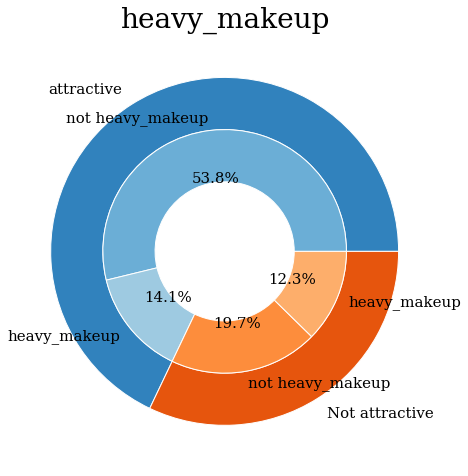

high_cheekbones
Attractive: (47446,32808)
Not Attractive: (19145,18766)
-------------------


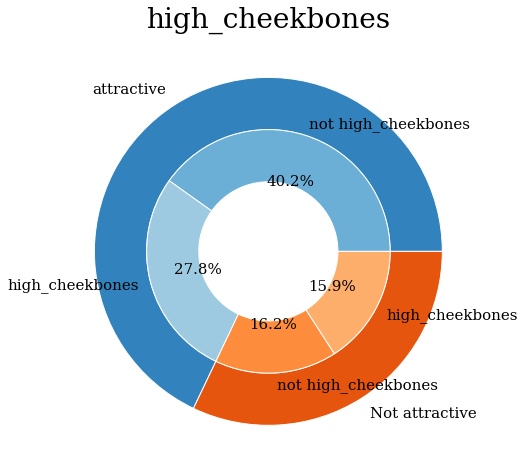

mouth_slightly_open
Attractive: (41816,38438)
Not Attractive: (20280,17631)
-------------------


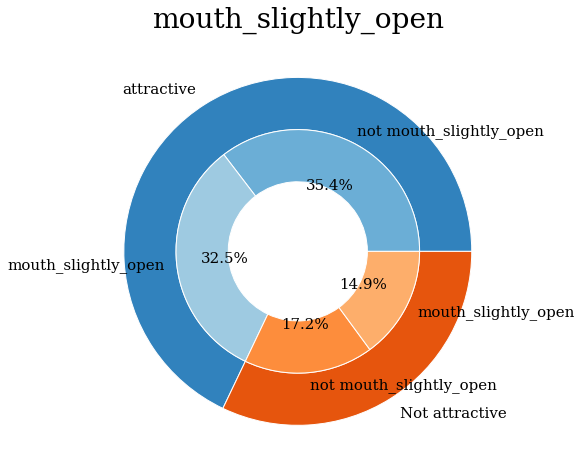

narrow_eyes
Attractive: (73056,7198)
Not Attractive: (31942,5969)
-------------------


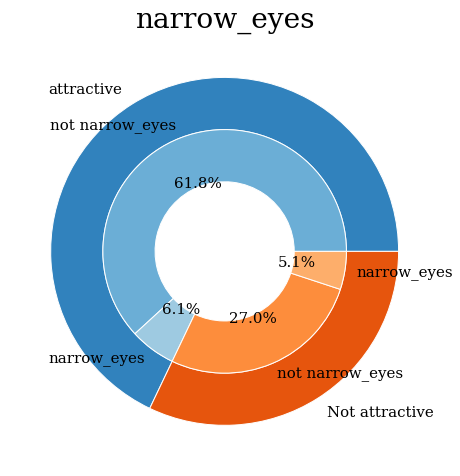

no_beard
Attractive: (80207,47)
Not Attractive: (37819,92)
-------------------


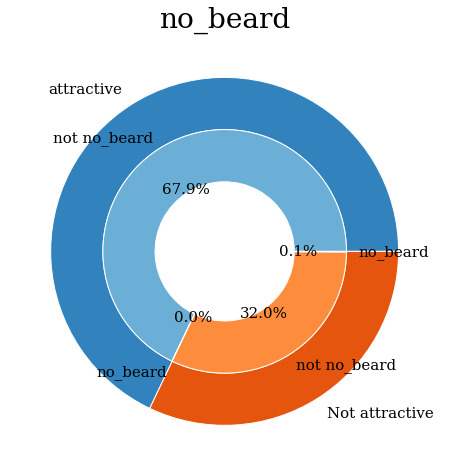

oval_face
Attractive: (48388,31866)
Not Attractive: (30780,7131)
-------------------


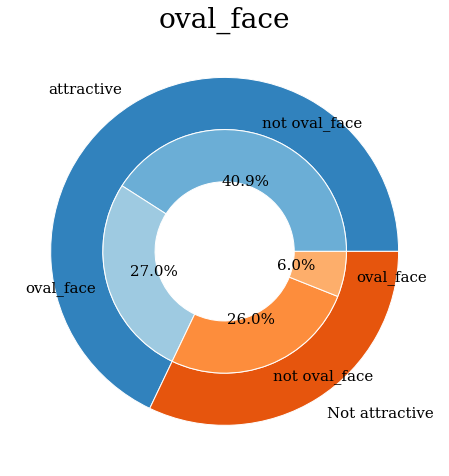

pale_skin
Attractive: (75076,5178)
Not Attractive: (36444,1467)
-------------------


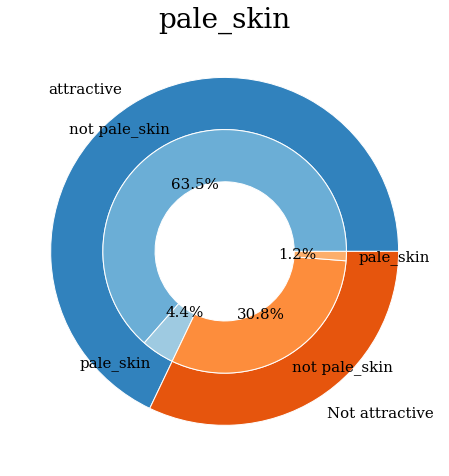

pointy_nose
Attractive: (46827,33427)
Not Attractive: (28840,9071)
-------------------


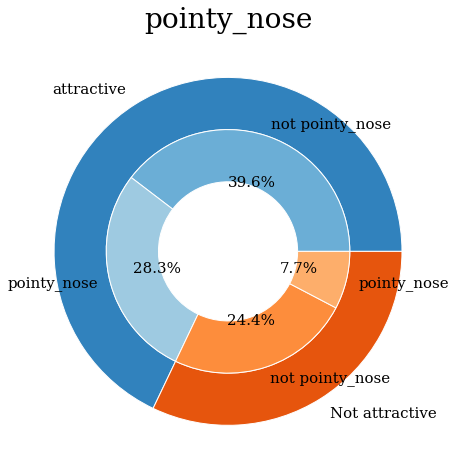

receding_hairline
Attractive: (77466,2788)
Not Attractive: (34449,3462)
-------------------


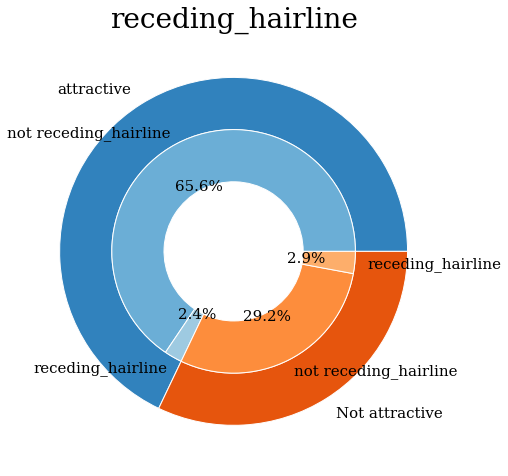

rosy_cheeks
Attractive: (69389,10865)
Not Attractive: (35715,2196)
-------------------


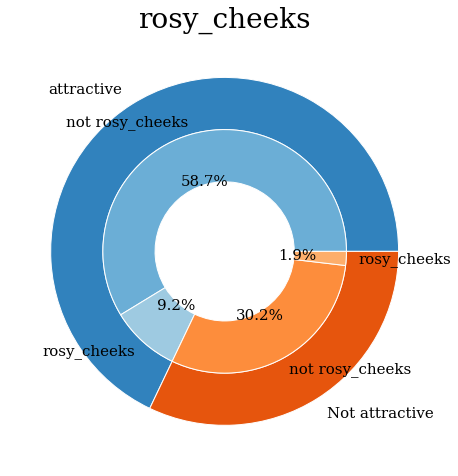

sideburns
Attractive: (80251,3)
Not Attractive: (37903,8)
-------------------


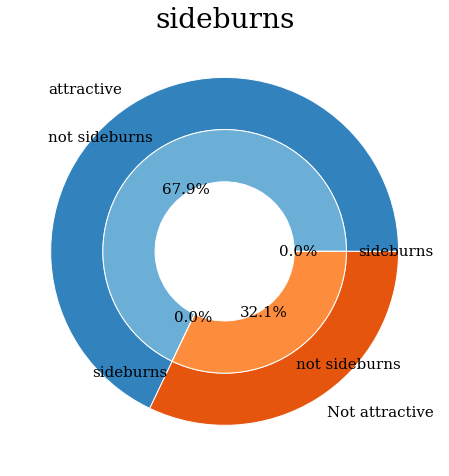

smiling
Attractive: (46168,34086)
Not Attractive: (20208,17703)
-------------------


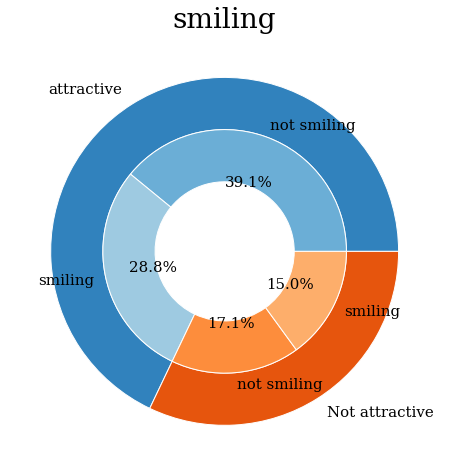

straight_hair
Attractive: (64947,15307)
Not Attractive: (31467,6444)
-------------------


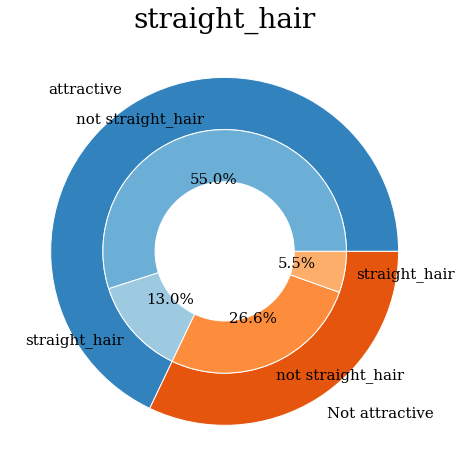

wavy_hair
Attractive: (41274,38980)
Not Attractive: (24039,13872)
-------------------


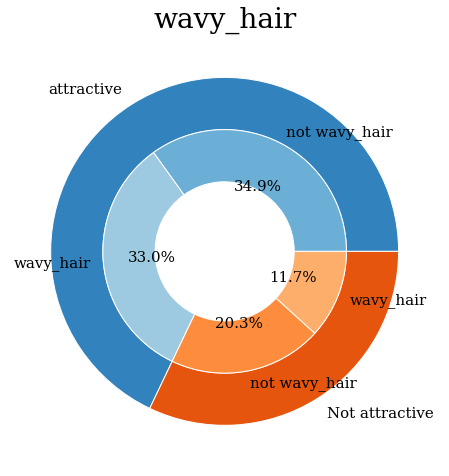

wearing_earrings
Attractive: (55899,24355)
Not Attractive: (25339,12572)
-------------------


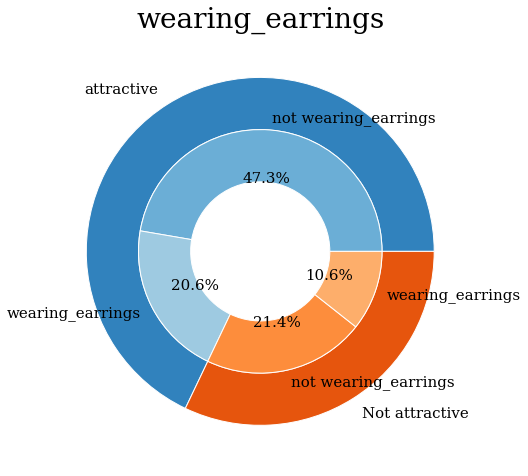

wearing_hat
Attractive: (79186,1068)
Not Attractive: (36032,1879)
-------------------


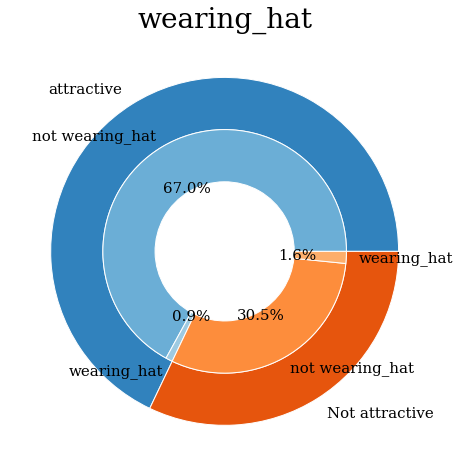

wearing_lipstick
Attractive: (73003,7251)
Not Attractive: (22189,15722)
-------------------


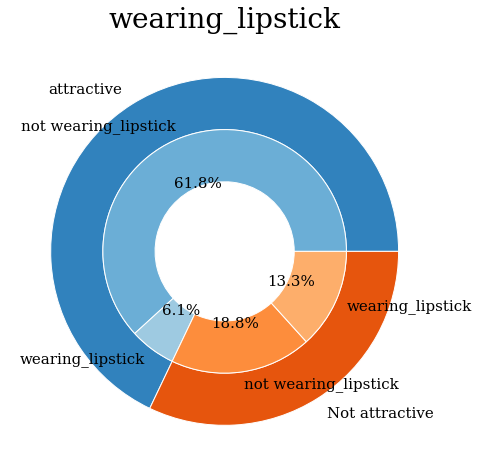

wearing_necklace
Attractive: (65595,14659)
Not Attractive: (29164,8747)
-------------------


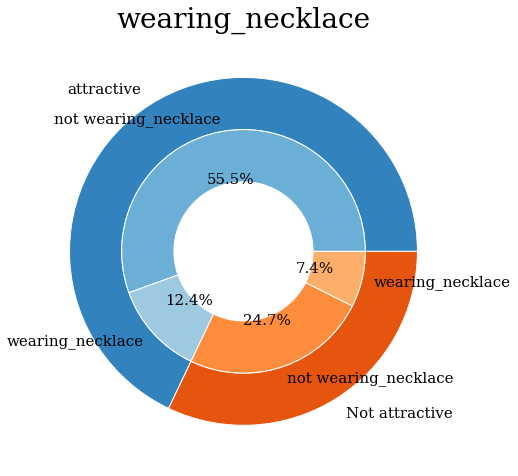

wearing_necktie
Attractive: (80240,14)
Not Attractive: (37890,21)
-------------------


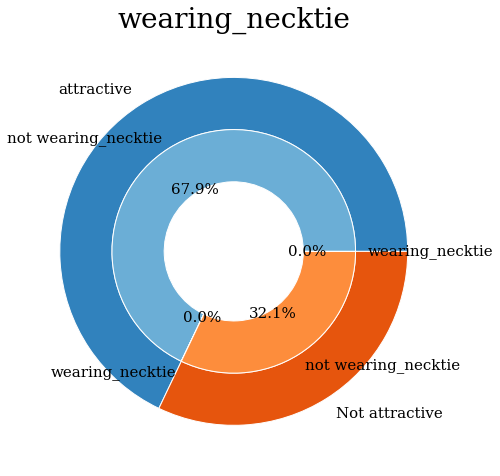

young
Attractive: (75388,4866)
Not Attractive: (27899,10012)
-------------------


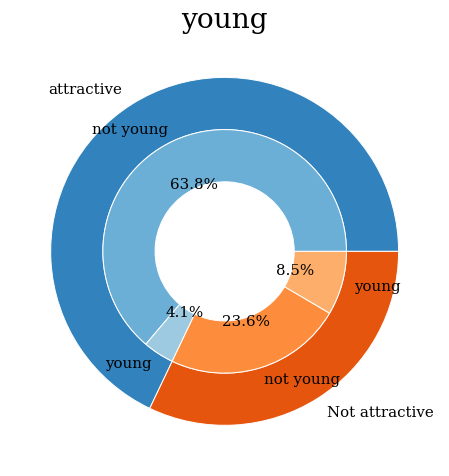

In [35]:
for i in female_df.columns[1:]:
    if i != 'attractive' and i!= 'mustache':
        plot_pie(female_df, attractive, i, 'attractive')
    else: 
        pass

In [19]:
female_df.columns

Index(['image_id', '5_o_clock_shadow', 'arched_eyebrows', 'attractive',
       'bags_under_eyes', 'bald', 'bangs', 'big_lips', 'big_nose',
       'black_hair', 'blond_hair', 'blurry', 'brown_hair', 'bushy_eyebrows',
       'chubby', 'double_chin', 'eyeglasses', 'goatee', 'gray_hair',
       'heavy_makeup', 'high_cheekbones', 'mouth_slightly_open', 'mustache',
       'narrow_eyes', 'no_beard', 'oval_face', 'pale_skin', 'pointy_nose',
       'receding_hairline', 'rosy_cheeks', 'sideburns', 'smiling',
       'straight_hair', 'wavy_hair', 'wearing_earrings', 'wearing_hat',
       'wearing_lipstick', 'wearing_necklace', 'wearing_necktie', 'young'],
      dtype='object')

In [34]:
female_df[female_df.mustache==1]

65617     0
119680    0
133478    0
Name: attractive, dtype: int64